# Global Power Plant Database

# Project Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database.
The database includes the following indicators


•	`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]

•	`country_long` (text): longer form of the country designation

•	`name` (text): name or title of the power plant, generally in Romanized form

•	`gppd_idnr` (text): 10 or 12 character identifier for the power plant

•	`capacity_mw` (number): electrical generating capacity in megawatts

•	`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

•	`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

•	`primary_fuel` (text): energy source used in primary electricity generation or export

•	`other_fuel1` (text): energy source used in electricity generation or export

•	`other_fuel2` (text): energy source used in electricity generation or export

•	`other_fuel3` (text): energy source used in electricity generation or export

•	 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available

•	`owner` (text): majority shareholder of the power plant, generally in Romanized form

•	`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form

•	`url` (text): web document corresponding to the `source` field

•	`geolocation_source` (text): attribution for geolocation information

•	`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

•	`year_of_capacity_data` (number): year the capacity information was reported

•	`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013

•	`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014


•	`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015

•	`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016

•	`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017

•	`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018

•	`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019

•	`generation_data_source` (text): attribution for the reported generation information

•	`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013

•	`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 

•	`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 

•	`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 

•	`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 

•	'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013

•	`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 

•	`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015

•	`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016

•	`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017



Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories.

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 



# Importing Libraries

In [11]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [12]:
df=pd.read_csv('database_IND.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.shape

(907, 27)

The dataset contains 907 rows and 27 columns

In [14]:
df.head(10)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.7470,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.3700,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
5,IND,India,AKRIMOTA LIG,IND0000003,250.0,23.7689,68.6447,Coal,Oil,NaN,...,2019.0,NaN,1153.421000,1208.8520,1175.765000,1147.913000,976.655000,NaN,Central Electricity Authority,NaN
6,IND,India,ALIYAR,IND0000004,60.0,10.4547,77.0078,Hydro,NaN,NaN,...,2019.0,NaN,157.558250,152.1952,61.421350,89.629600,48.327150,NaN,Central Electricity Authority,NaN
7,IND,India,ALLAIN DUHANGAN,IND0000005,192.0,32.2258,77.2070,Hydro,NaN,NaN,...,2019.0,NaN,674.391100,721.3352,675.724400,679.594950,579.318850,NaN,Central Electricity Authority,NaN
8,IND,India,ALMATTI DAM,IND0000006,290.0,16.3300,75.8863,Hydro,NaN,NaN,...,2019.0,NaN,480.594950,144.4342,402.029750,439.372100,406.377900,NaN,Central Electricity Authority,NaN
9,IND,India,AMAR KANTAK,IND0000007,210.0,23.1642,81.6373,Coal,Oil,NaN,...,2019.0,NaN,1887.904000,1643.0460,1338.093000,1563.457000,1487.880000,NaN,Central Electricity Authority,NaN


Top 10 rows of the dataset

In [15]:
df.tail(10)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
897,IND,India,Wind power project by Riddhi Siddhi Gluco Biol...,WRI1026753,34.65,8.8709,77.4466,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
898,IND,India,Wind power project in Rajasthan,WRI1026769,42.00,27.1715,70.6877,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
899,IND,India,YAMUNANAGAR TPP,IND0000511,600.00,30.1081,77.3257,Coal,Oil,NaN,...,2019.0,NaN,3194.35982,3709.552200,3123.572061,3156.053669,3039.66118,NaN,Central Electricity Authority,NaN
900,IND,India,YASHWANTRAO MOHITE,WRI1019995,16.00,17.1653,74.2456,Biomass,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
901,IND,India,YELHANKA (DG),IND0000512,106.60,13.1156,77.5838,Oil,NaN,NaN,...,2019.0,NaN,0.00000,0.000000,0.000000,NaN,0.00000,NaN,Central Electricity Authority,NaN
902,IND,India,YERMARUS TPP,IND0000513,1600.00,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.50000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.00,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.50,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.00,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.50,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Last 10 rows of the dataset

# Exploratory Data Analysis [EDA]

In [16]:
df.columns.to_list()

['country',
 'country_long',
 'name',
 'gppd_idnr',
 'capacity_mw',
 'latitude',
 'longitude',
 'primary_fuel',
 'other_fuel1',
 'other_fuel2',
 'other_fuel3',
 'commissioning_year',
 'owner',
 'source',
 'url',
 'geolocation_source',
 'wepp_id',
 'year_of_capacity_data',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018',
 'generation_gwh_2019',
 'generation_data_source',
 'estimated_generation_gwh']

List of all the columns present in the dataset

In [17]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

Here we can see different- different types of data present in the columns. This dataset has ['object', 'float64'] type data present 

# Checking For Duplicate Values

In [18]:
df.duplicated().sum()

0

There are no duplicate values present in the dataset

# Checking for White space

In [19]:
# Check for white spaces
has_white_spaces = ' ' in df
print(has_white_spaces)

False


We can say that there is no white space available in the dataset.

# Checking For Null Values

In [20]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

Here we can say that most of the columns present in the data has missing values.

In column['other_fuel2', 'other_fuel3','wepp_id','generation_gwh_2013', 'generation_gwh_2019','estimated_generation_gwh' ] have completely missing values.

Columns [latitude and longitude] have 46 missing values.

Columns [other_fuel1, commissioning_year, owner,year_of_capacity_data] and some of the importtant columns having missing values near about 500.

<AxesSubplot:>

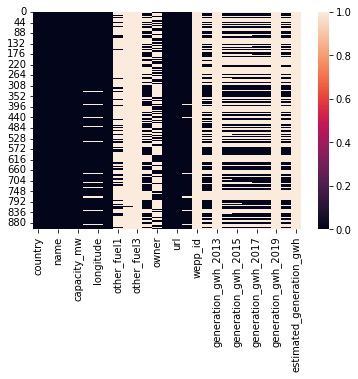

In [21]:
#By using heatmap
sns.heatmap(df.isnull())

By visualizaton we can see that the null values are present in the dataset.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

It is showing a general information about the dataset like types of data present in the columns, prescence of not null values, column names, memory occupied by the dataset.

# Droping Unnecessary Columns From The Dataset.

In [23]:
df.drop(['country', 'country_long'], inplace=True, axis=1)

Here column [country, country_long] are just the name, and here we have the  data only for india, so droping this will not effect on output. so we will drop this columns 

In [24]:
df.drop(['other_fuel1','other_fuel2', 'other_fuel3', 'wepp_id','url','geolocation_source', 'generation_data_source', 'estimated_generation_gwh', 'generation_data_source', 'source'], inplace= True, axis=1)

wepp_id, generation_data_source, estimated_generation_gwh also not relevent.These columns are having so many Nan values, instead of filling we will drop them 
other_fuel1,other_fuel2, other_fuel3 are also having many Nan values,So we will drope them also.

In [25]:
df.drop(['year_of_capacity_data'], inplace= True, axis= 1)

In [26]:
df.drop(['generation_gwh_2013'], inplace= True, axis= 1)
df.drop(['generation_gwh_2019'], inplace= True, axis= 1)

year_of_capacity_data columns also has high Nan values so we will also drop it 

In [27]:
df.shape

(907, 13)

After droping unnecessary columns from the data we can see that out of 27 columns only 13 columns are left now we will try to fill the null value which present in the remaining columns.

# Filling Null Values

In [29]:
df.isnull().sum()

name                     0
gppd_idnr                0
capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
owner                  565
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [30]:
df['generation_gwh_2014'].fillna(value=df['generation_gwh_2014'].median(), inplace= True)
df['generation_gwh_2015'].fillna(value=df['generation_gwh_2015'].median(), inplace= True)
df['generation_gwh_2016'].fillna(value=df['generation_gwh_2016'].median(), inplace= True)
df['generation_gwh_2017'].fillna(value=df['generation_gwh_2017'].median(), inplace= True)

In [31]:
df['generation_gwh_2018'].fillna(value=df['generation_gwh_2018'].median(), inplace= True)

In [32]:
df['commissioning_year'].fillna(value=df['commissioning_year'].median(), inplace= True)

In [33]:
df['latitude'].fillna(value=df['latitude'].mean(), inplace= True)
df['longitude'].fillna(value=df['longitude'].mean(), inplace= True) 

In [34]:
df.isnull().sum()

name                     0
gppd_idnr                0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year       0
owner                  565
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
dtype: int64

# Description Of Dataset

In [35]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,1998.728776,1516.689956,1510.071296,1565.361383,1657.121797,1665.011030
std,590.085456,6.079148,4.812291,13.158621,2785.604307,2984.994556,3005.087210,3046.862910,3168.826750
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1998.000000,801.123775,711.181225,737.205450,817.977250,751.644375
50%,59.200000,21.281800,76.979200,2001.000000,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,25.176450,79.206100,2003.000000,801.123775,711.181225,737.205450,817.977250,751.644375
max,4760.000000,34.649000,95.408000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


Observation=

1. The count for all the rows is same so there are no null values present in the dataset.


2. In most of the columns mean is greater than median so skewness is present in the dataset.


3. There is a huge difference between 75th percentile and max values so outliers are also present in the dataset.


4. We can observe mean, std, min., 25%,50%,75% th percentile, max. values of the data.

# Data Visualization

# Univarient Analysis

In [36]:
df['owner'].value_counts()

Acc Acc ltd                                                    4
Sterling Agro Industries ltd.                                  4
Jk Cement ltd                                                  4
SWPPL                                                          3
Jaypee Ltd jccl)                                               3
                                                              ..
Sunkon Energy Private Limited                                  1
West Bengal Energy Development Corporation Limited (WBEDCL)    1
Energy Infratech Private Limited                               1
K. N. Ram                                                      1
iEnergy Wind Farms                                             1
Name: owner, Length: 280, dtype: int64

We can see that ACC LTD, JK Cement LTD , and Sterling having maximum number (4) of power plants.
SWPPL, Jaypee Ltd jccl having 3 power plant.
Other having 2 or only single power plant.

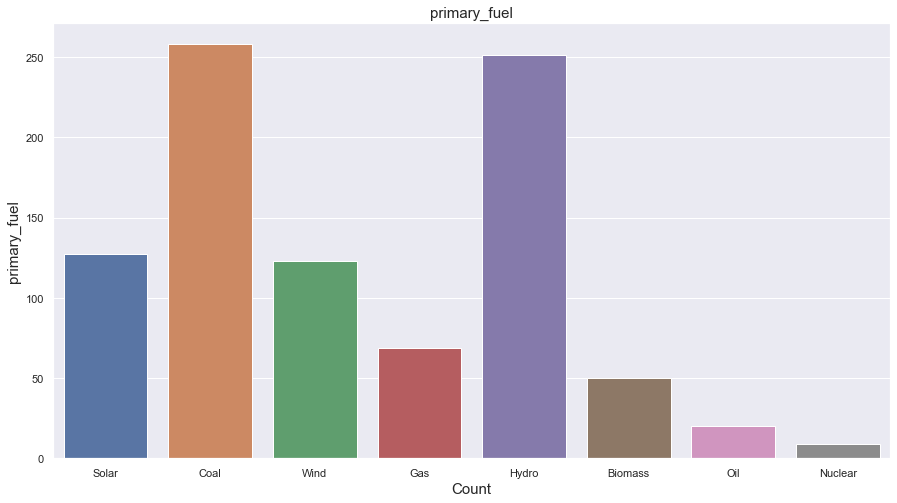

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [37]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,8))
sns.countplot(df['primary_fuel'] )
plt.xlabel('Count', fontsize=15 )
plt.ylabel('primary_fuel', fontsize=15 )
plt.title('primary_fuel', fontsize=15)
plt.show()

df['primary_fuel'].value_counts()

Here we can see that most of the power plants are using Coal and Hydro as the primary fuel.
Coal having maximum counts, which indicates most of the power generation plant using coal as their primary fuel.
Use of solar and wind also considerable.

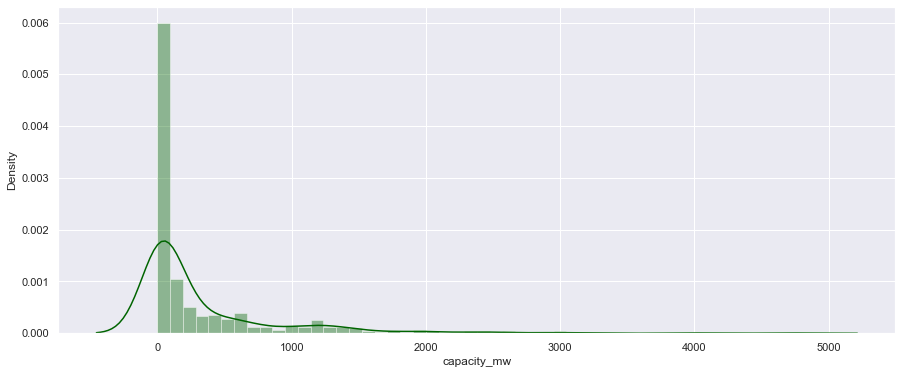

In [38]:
plt.figure(figsize=(15,6))
sns.distplot(df['capacity_mw'], color='darkgreen')
plt.show()

Here we can see the probablity of capacity greater than 1000 is less.
Data is not normaly distributed.
Data having outliers.

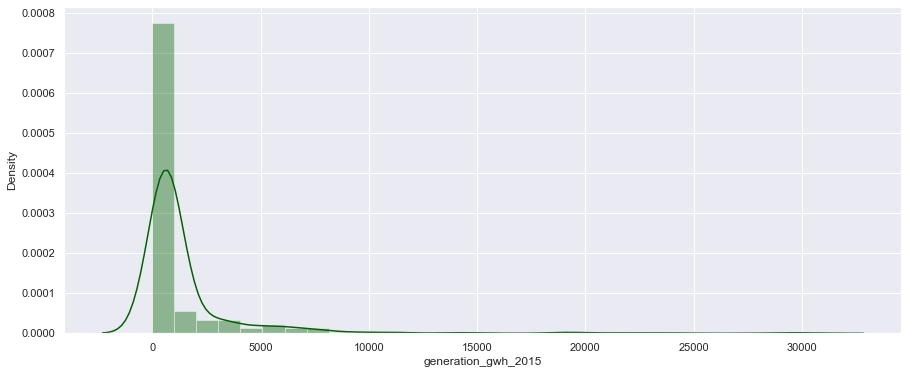

In [39]:
plt.figure(figsize=(15,6))
sns.distplot(df['generation_gwh_2015'], color='darkgreen')
plt.show()

Data is not distributed normally, it is having skewness.

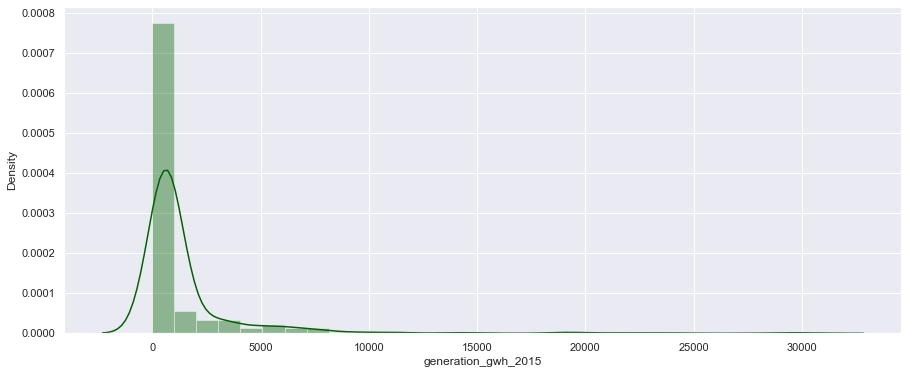

In [40]:
plt.figure(figsize=(15,6))
sns.distplot(df['generation_gwh_2015'], color='darkgreen')
plt.show()

Data is not distributed normally, it is having skewness.

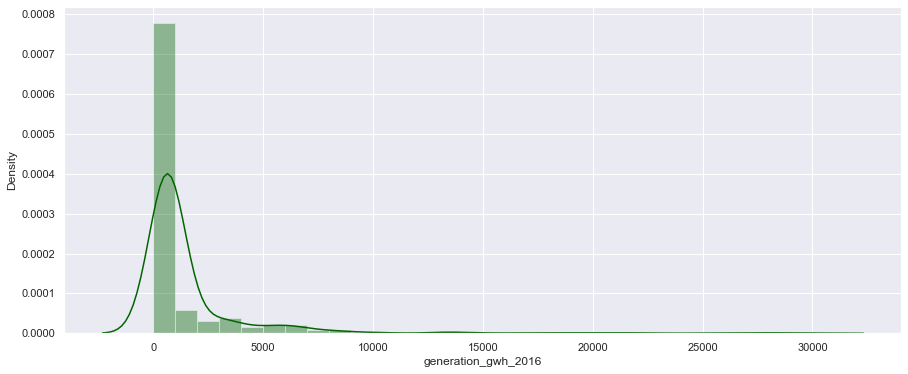

In [41]:
plt.figure(figsize=(15,6))
sns.distplot(df['generation_gwh_2016'], color='darkgreen')
plt.show()

Data is not distributed normally, it is having skewness.

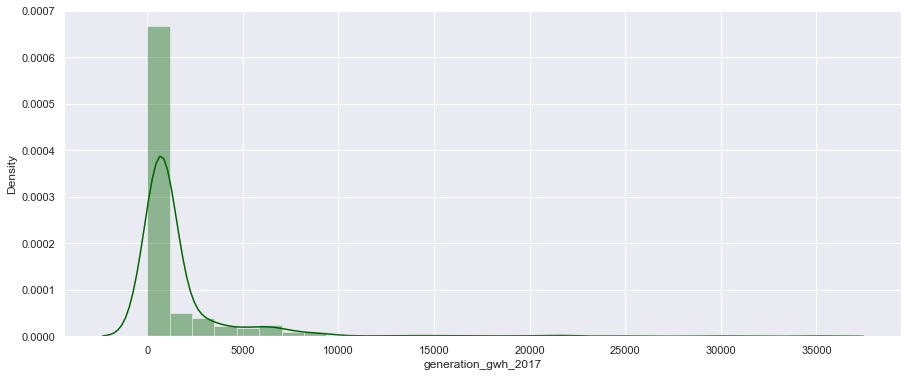

In [42]:
plt.figure(figsize=(15,6))
sns.distplot(df['generation_gwh_2017'], color='darkgreen')
plt.show()

Data is not distributed normally, it is having skewness.

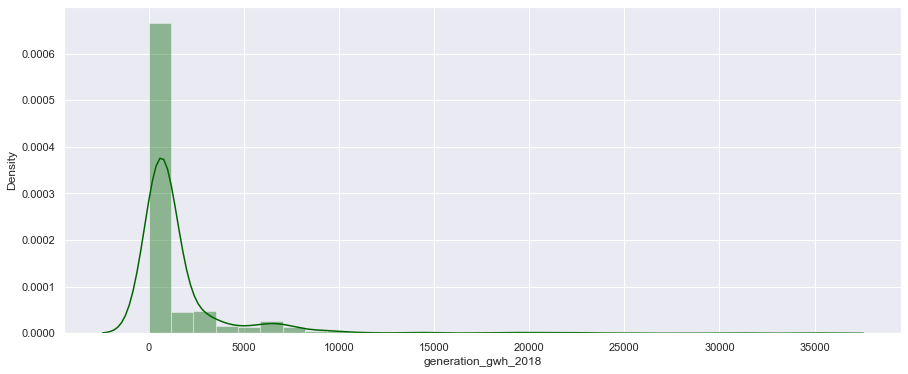

In [43]:
plt.figure(figsize=(15,6))
sns.distplot(df['generation_gwh_2018'], color='darkgreen')
plt.show()

Data is not distributed normally, it is having skewness.

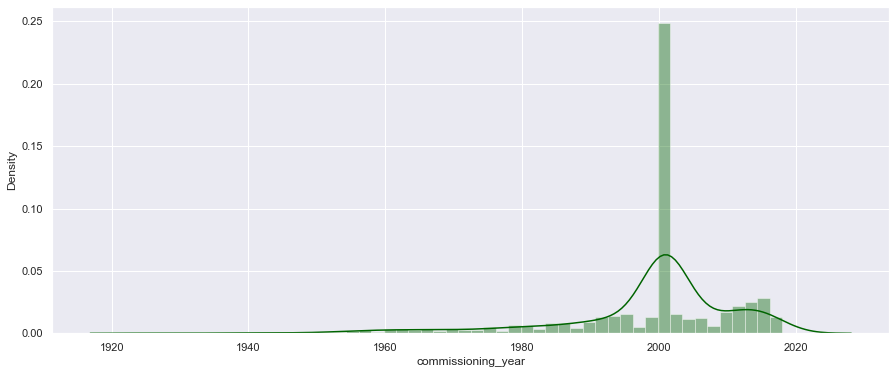

In [44]:
plt.figure(figsize=(15,6))
sns.distplot(df['commissioning_year'], color='darkgreen')
plt.show()

Data is not distributed normally, it is having skewness.

# Bivarient Analysis

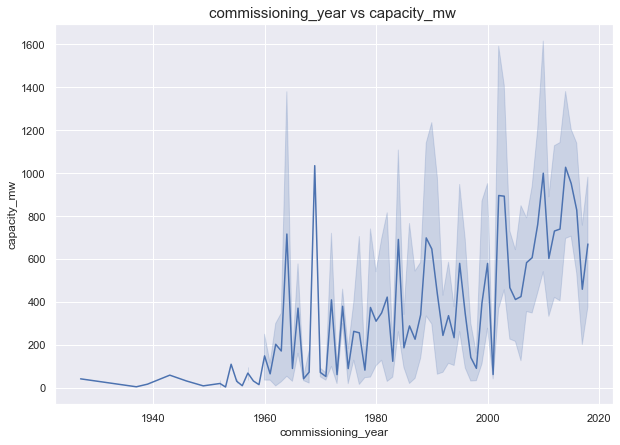

In [45]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df, x='commissioning_year',y='capacity_mw')
plt.title('commissioning_year vs capacity_mw ', fontsize=15)
plt.show()

Here we can see with increase in the years the devlopment of plants incerases and capcaity also incresed.

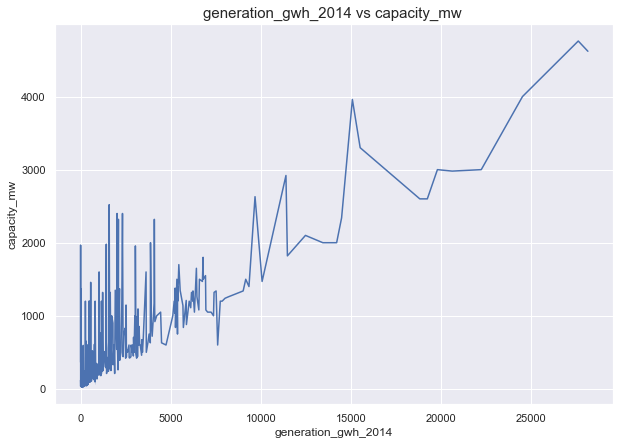

In [46]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df, x='generation_gwh_2014',y='capacity_mw')
plt.title('generation_gwh_2014 vs capacity_mw ', fontsize=15)
plt.show()

with higher capacity, generation_gwh_2014 also incresing.

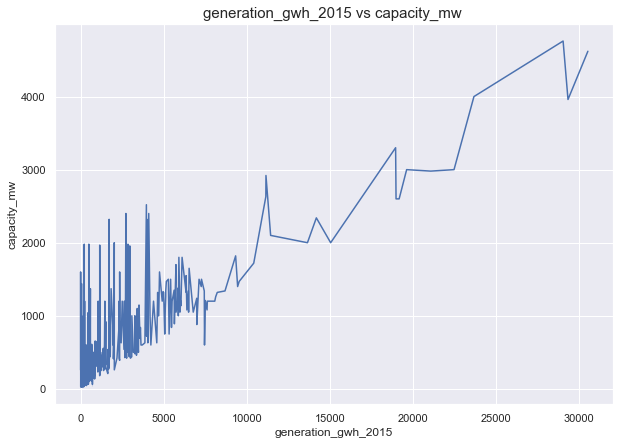

In [47]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df, x='generation_gwh_2015',y='capacity_mw')
plt.title('generation_gwh_2015 vs capacity_mw ', fontsize=15)
plt.show()

with higher capacity, generation_gwh_2015 also incresing.

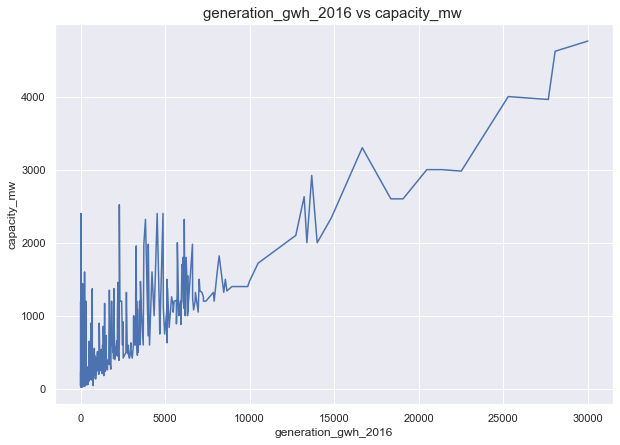

In [48]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df, x='generation_gwh_2016',y='capacity_mw')
plt.title('generation_gwh_2016 vs capacity_mw ', fontsize=15)
plt.show()

with higher capacity, generation_gwh_2016 also incresing.

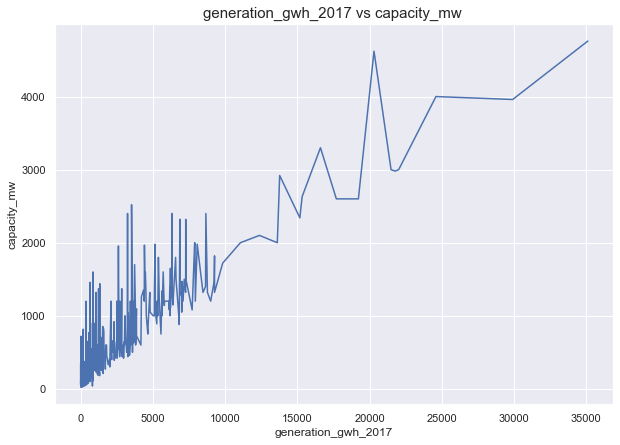

In [49]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df, x='generation_gwh_2017',y='capacity_mw')
plt.title('generation_gwh_2017 vs capacity_mw ', fontsize=15)
plt.show()

with higher capacity, generation_gwh_2017 also incresing.

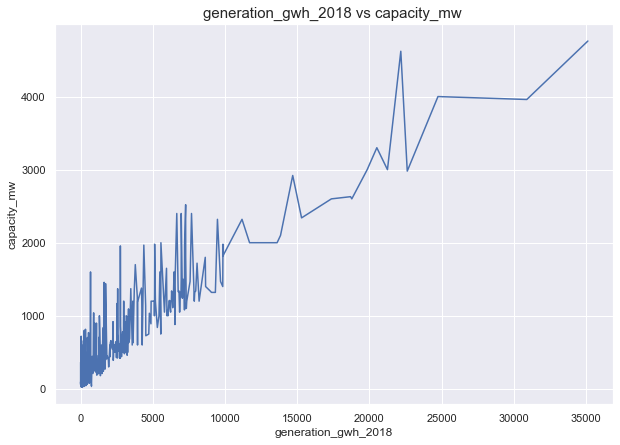

In [50]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df, x='generation_gwh_2018',y='capacity_mw')
plt.title('generation_gwh_2018 vs capacity_mw ', fontsize=15)
plt.show()

with higher capacity, generation_gwh_2018 also incresing.

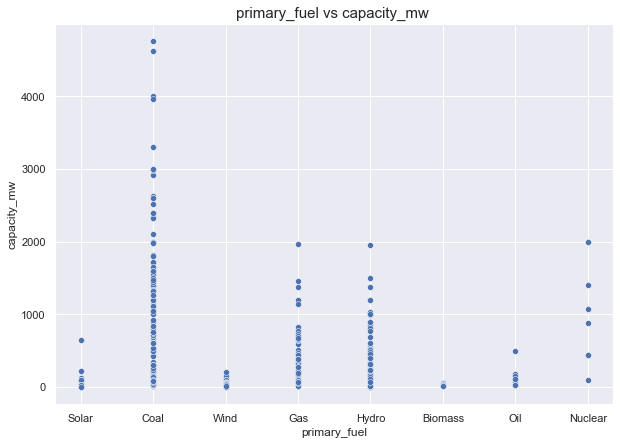

In [51]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x='primary_fuel',y='capacity_mw')
plt.title('primary_fuel vs capacity_mw ', fontsize=15)
plt.show()

Here we can clearly see that coal is used most as primary fule 

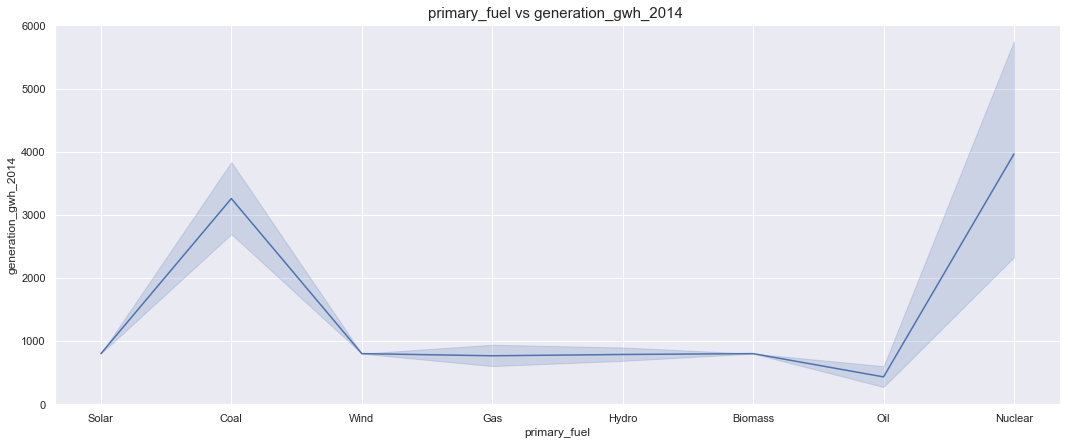

In [52]:
plt.figure(figsize=(18,7))
sns.lineplot(data=df, x='primary_fuel',y='generation_gwh_2014')
plt.title('primary_fuel vs generation_gwh_2014 ', fontsize=15)
plt.show()

We can see coal is the primary fuel for power generation in 2014

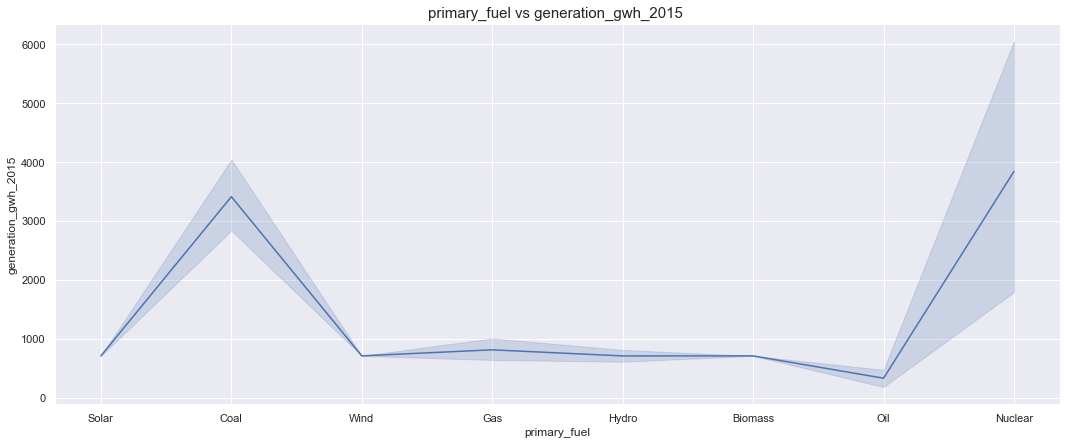

In [53]:
plt.figure(figsize=(18,7))
sns.lineplot(data=df, x='primary_fuel',y='generation_gwh_2015')
plt.title('primary_fuel vs generation_gwh_2015 ', fontsize=15)
plt.show()

We can see coal is the primary fuel for power generation in 2015

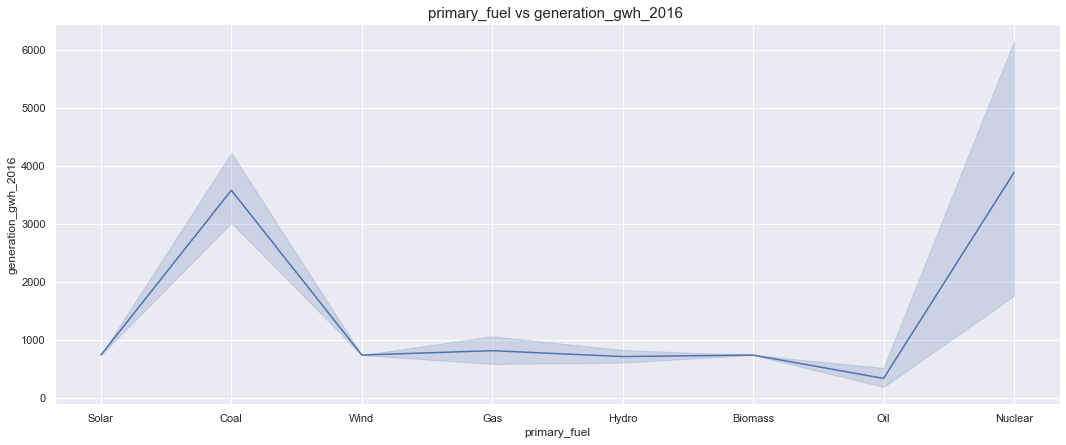

In [54]:
plt.figure(figsize=(18,7))
sns.lineplot(data=df, x='primary_fuel',y='generation_gwh_2016')
plt.title('primary_fuel vs generation_gwh_2016 ', fontsize=15)
plt.show()

We can see coal is the primary fuel for power generation in 2016

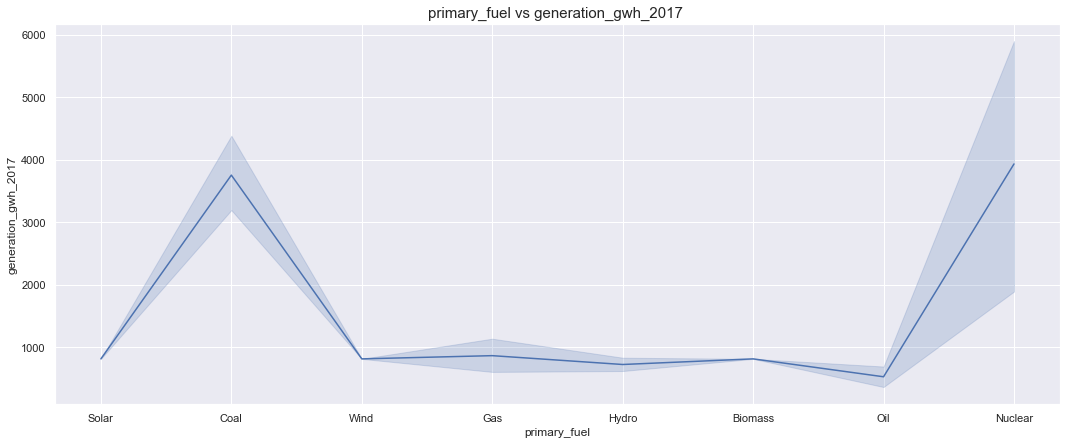

In [55]:
plt.figure(figsize=(18,7))
sns.lineplot(data=df, x='primary_fuel',y='generation_gwh_2017')
plt.title('primary_fuel vs generation_gwh_2017 ', fontsize=15)
plt.show()

We can see coal is the primary fuel for power generation in 2017

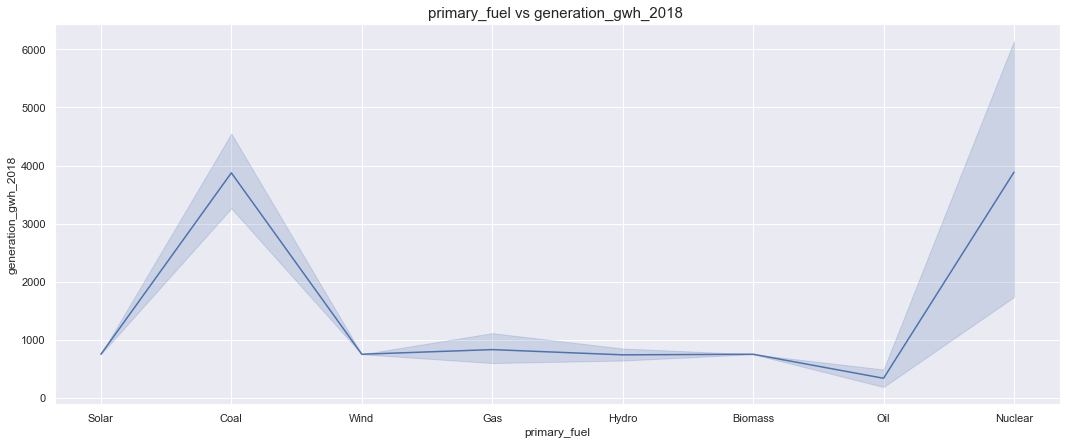

In [56]:
plt.figure(figsize=(18,7))
sns.lineplot(data=df, x='primary_fuel',y='generation_gwh_2018')
plt.title('primary_fuel vs generation_gwh_2018 ', fontsize=15)
plt.show()

We can see coal is the primary fuel for power generation in 2018

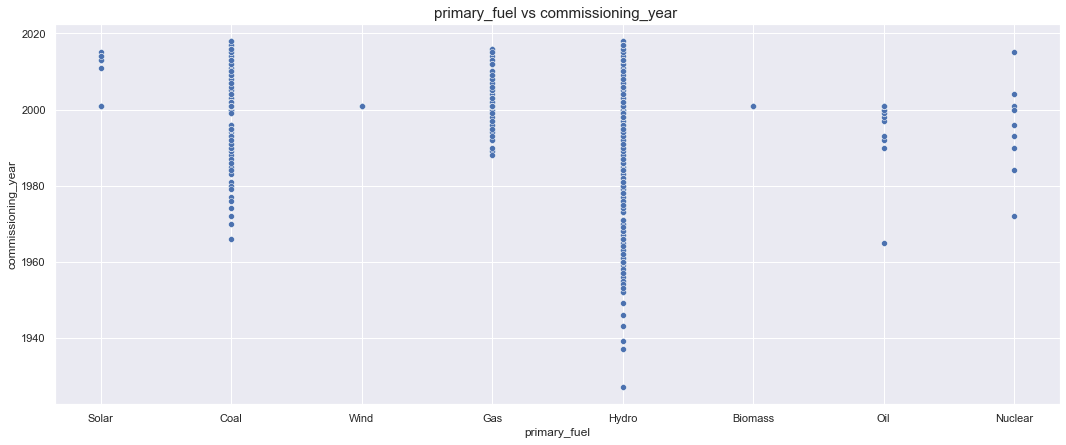

In [57]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x='primary_fuel',y='commissioning_year')
plt.title('primary_fuel vs commissioning_year ', fontsize=15)
plt.show()

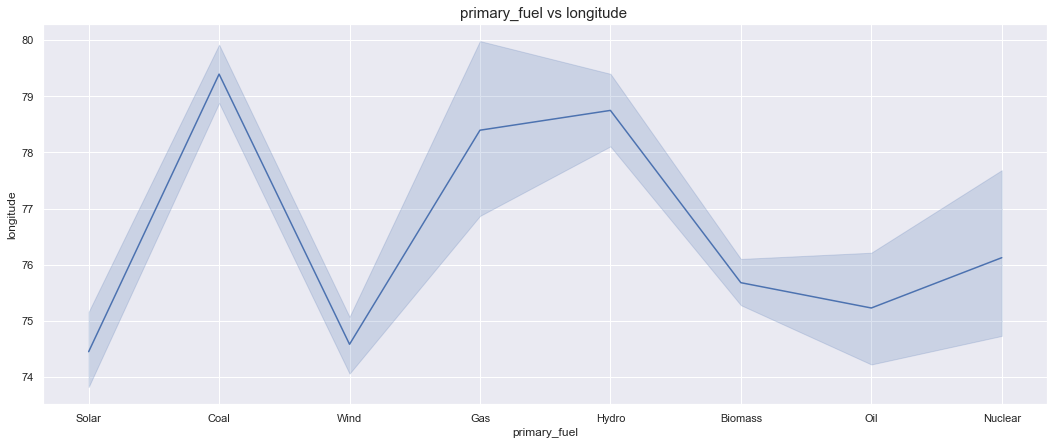

In [58]:
plt.figure(figsize=(18,7))
sns.lineplot(data=df, x='primary_fuel',y='longitude')
plt.title('primary_fuel vs longitude ', fontsize=15)
plt.show()

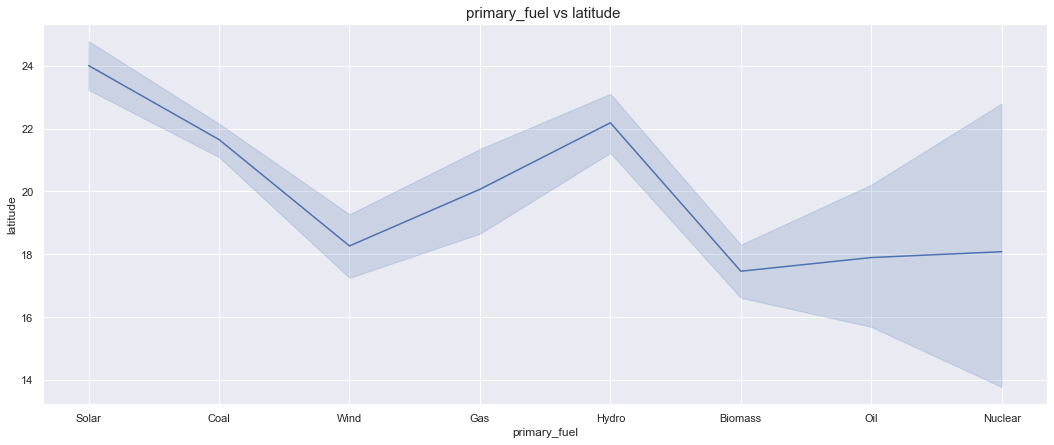

In [59]:
plt.figure(figsize=(18,7))
sns.lineplot(data=df, x='primary_fuel',y='latitude')
plt.title('primary_fuel vs latitude ', fontsize=15)
plt.show()

# Multivarient Analysis 

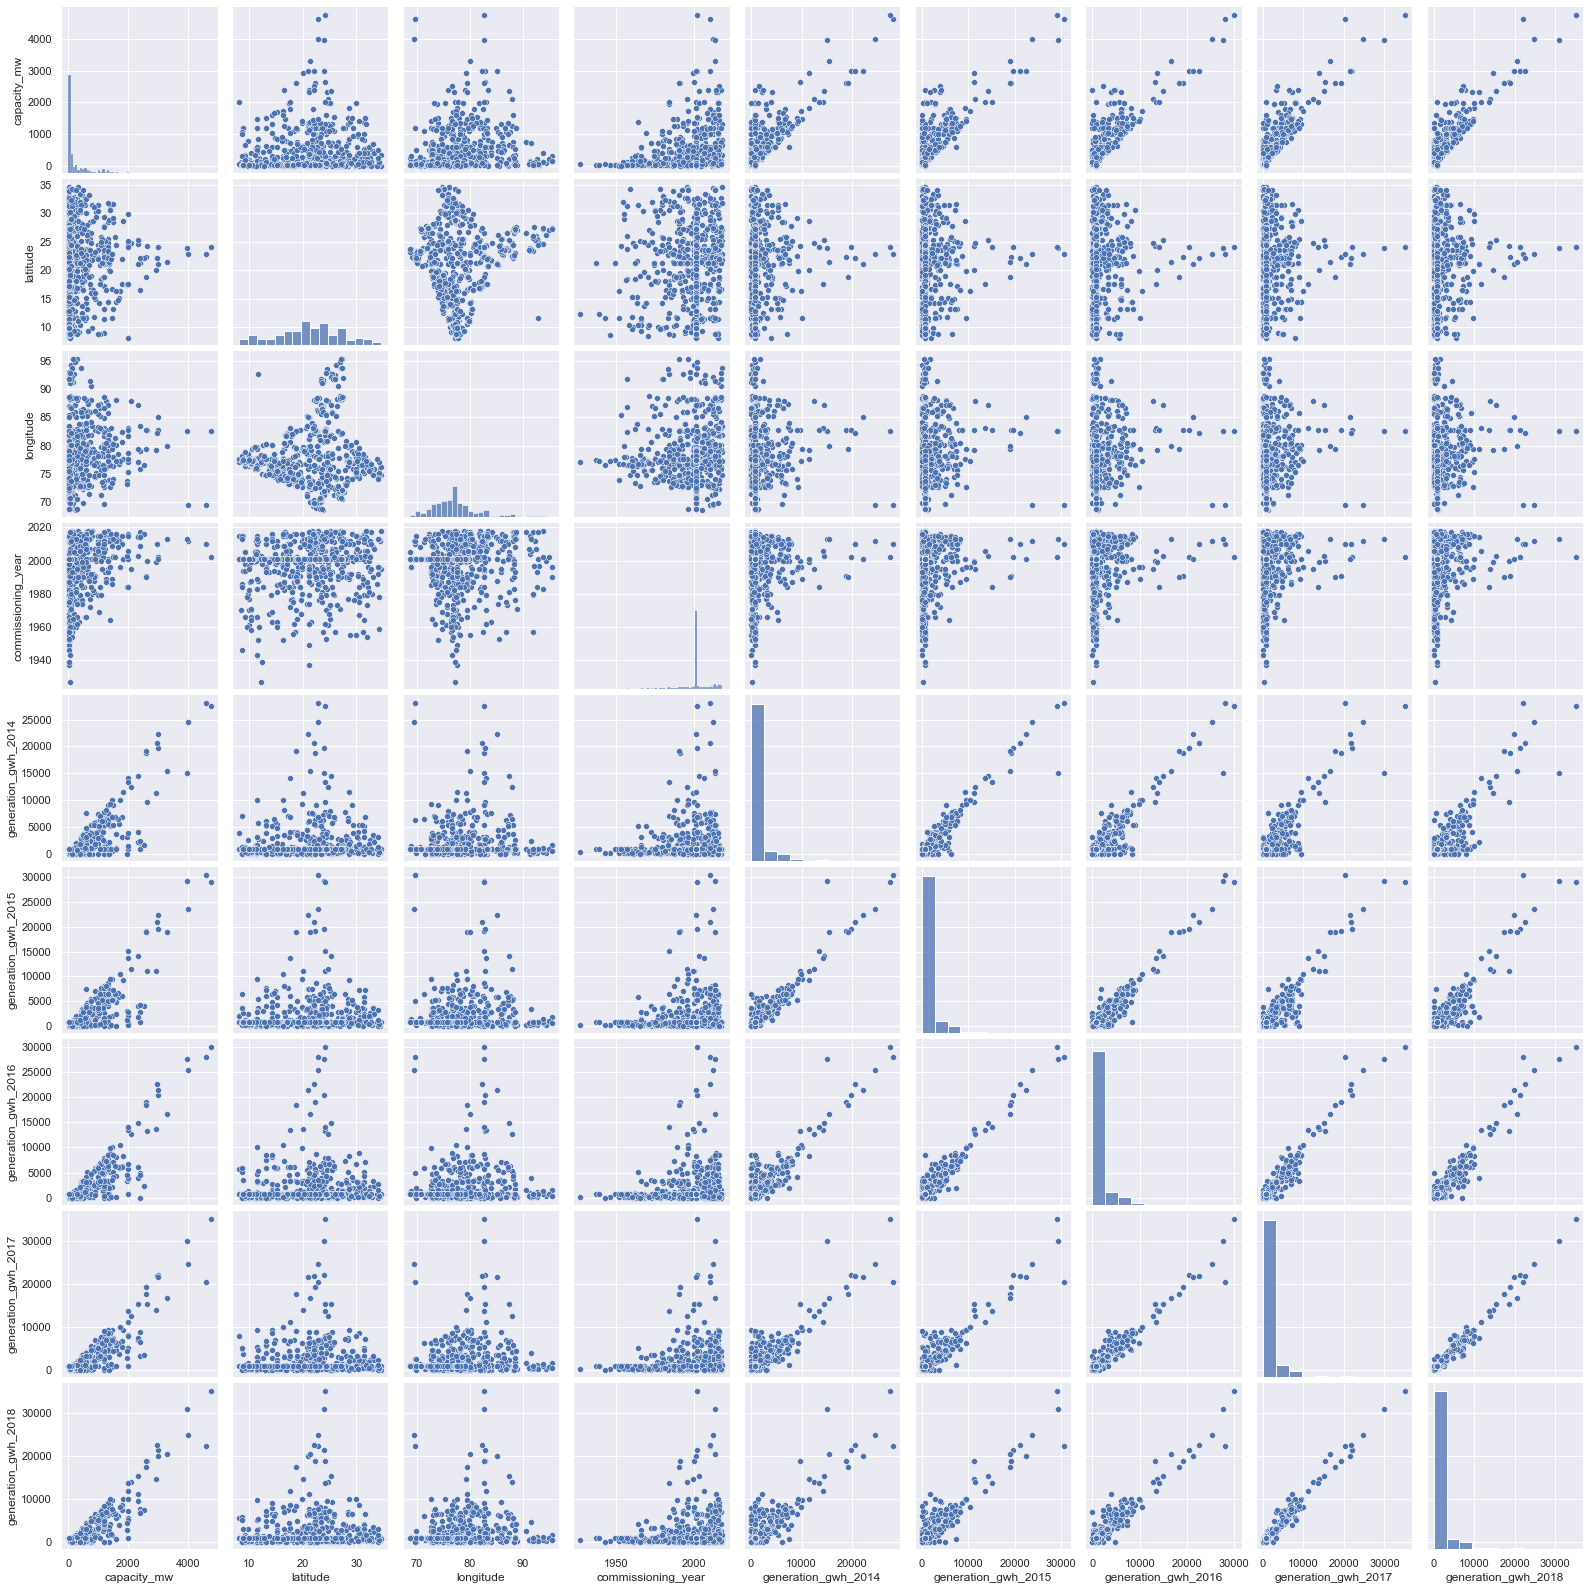

In [60]:
sns.pairplot(df)

Here we can see that name, gppd_idnr, owner, commissioning_year are not playing good role, we can drop these columns

In [61]:
df.drop(['name','gppd_idnr','owner','commissioning_year'], axis=1, inplace= True)

In [62]:
df.head(2)

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,801.123775,711.181225,737.20545,817.97725,751.644375
1,98.0,24.7663,74.6090,Coal,801.123775,711.181225,737.20545,817.97725,751.644375


In [63]:
df.shape

(907, 9)

# Encoding Categorical Columns

In [64]:

for col in df.select_dtypes(include='object').columns:
    df[col] = pd.Categorical(df[col])
    df[col] = df[col].cat.codes

df

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,24.7663,74.6090,1,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,21.9038,69.3732,7,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,23.8712,91.3602,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,801.123775,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6,801.123775,711.181225,737.205450,817.977250,751.644375
904,25.5,15.2758,75.5811,7,801.123775,711.181225,737.205450,817.977250,751.644375
905,80.0,24.3500,73.7477,1,801.123775,711.181225,737.205450,817.977250,751.644375


# Checking for the outliers

we never check the presence of outliers from categorical columns and label columns

To check the presence of outliers with help of visualization we use boxplot to see if the outliers are present or not

In [65]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

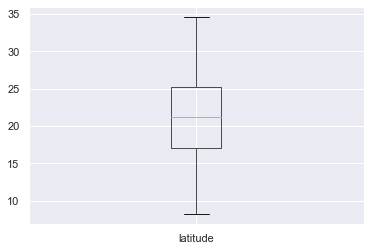

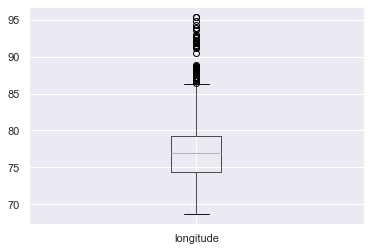

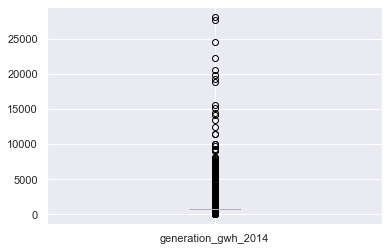

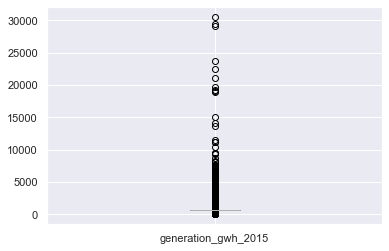

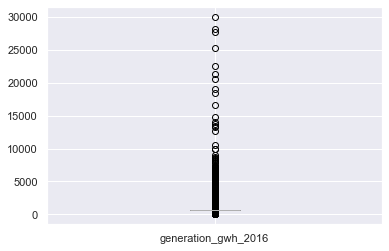

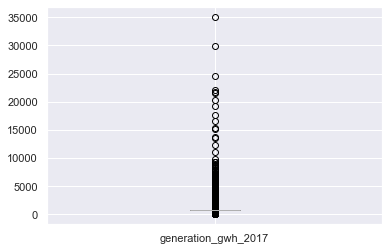

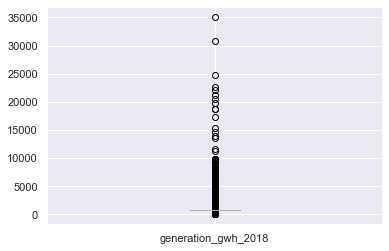

In [66]:
#checking for outliers by visualiztion 
col_list=['latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']
for col in col_list:
    df.boxplot(col)
    plt.show()

Here by visualizing with boxplot we can say that outliers are present in the dataset. 

# Removing outliers

In [67]:
#Removing outliers
from scipy.stats import zscore
col_list=df[['latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']]
z=np.abs(zscore(col_list))

z

,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,1.149805,0.878280,0.257022,0.267783,0.275737,0.275565,0.288394
1,0.587311,0.593788,0.257022,0.267783,0.275737,0.275565,0.288394
2,0.116179,1.682394,0.257022,0.267783,0.275737,0.275565,0.288394
3,0.439989,2.889052,0.322873,0.223348,0.226194,0.326203,0.327990
4,0.125479,1.027976,0.545554,1.476964,1.557432,1.224379,1.772608
...,...,...,...,...,...,...,...
902,0.806975,0.022477,0.257022,0.505833,0.443415,0.259992,0.308963
903,1.366853,0.145644,0.257022,0.267783,0.275737,0.275565,0.288394
904,0.974707,0.391673,0.257022,0.267783,0.275737,0.275565,0.288394
905,0.518793,0.772866,0.257022,0.267783,0.275737,0.275565,0.288394


In [68]:
threshold=3

print(np.where(z>3))

(array([ 15,  15,  15,  15, 143, 143, 143, 143, 143, 158, 179, 183, 209,
       209, 209, 209, 209, 244, 308, 308, 308, 308, 308, 323, 333, 340,
       360, 364, 364, 364, 364, 364, 416, 427, 482, 493, 493, 493, 493,
       493, 494, 494, 494, 494, 494, 499, 519, 532, 546, 577, 623, 638,
       648, 648, 648, 648, 648, 657, 657, 657, 657, 657, 695, 695, 695,
       695, 695, 721, 721, 721, 721, 721, 724, 724, 724, 724, 724, 726,
       726, 726, 726, 726, 786, 786, 786, 786, 786, 808, 808, 808, 808,
       808, 818, 847, 880, 880, 880, 880, 880], dtype=int64), array([3, 4, 5, 6, 2, 3, 4, 5, 6, 2, 1, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5,
       6, 1, 1, 1, 1, 2, 3, 4, 5, 6, 1, 1, 6, 2, 3, 4, 5, 6, 2, 3, 4, 5,
       6, 1, 1, 2, 1, 1, 2, 1, 2, 3, 4, 5, 6, 2, 3, 4, 5, 6, 2, 3, 4, 5,
       6, 2, 3, 4, 5, 6, 2, 3, 4, 5, 6, 2, 3, 4, 5, 6, 2, 3, 4, 5, 6, 2,
       3, 4, 5, 6, 1, 1, 2, 3, 4, 5, 6], dtype=int64))


In [69]:
df_new=df[(z<3).all(axis=1)]

df_new

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,24.7663,74.6090,1,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,21.9038,69.3732,7,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,23.8712,91.3602,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,801.123775,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6,801.123775,711.181225,737.205450,817.977250,751.644375
904,25.5,15.2758,75.5811,7,801.123775,711.181225,737.205450,817.977250,751.644375
905,80.0,24.3500,73.7477,1,801.123775,711.181225,737.205450,817.977250,751.644375


In [70]:
df_new.shape

(871, 9)

In [71]:
df.shape

(907, 9)

In [72]:
#Checking dataloss
Dataloss = (((907-856)/907)*100)
Dataloss

5.622932745314222

we have loss the 5.6% of the data after removing outliers which is less than 10% so we can proceed with new the data

In [73]:
df=df_new

In [74]:
df.shape

(871, 9)

# Checking skewness

In [75]:
df.skew()

capacity_mw            2.207091
latitude              -0.111898
longitude              0.932815
primary_fuel           0.426394
generation_gwh_2014    2.978658
generation_gwh_2015    2.752239
generation_gwh_2016    2.682074
generation_gwh_2017    2.581940
generation_gwh_2018    2.634701
dtype: float64

Accpectable range for skewness is -0.5 to +0.5 so we can say that skewness is present in the dataset and we have to treat the skewness.

We will use square root method to treat the skewness present in the dataset

In [76]:
df['generation_gwh_2018']=np.sqrt(df['generation_gwh_2018'])
df['generation_gwh_2017']=np.sqrt(df['generation_gwh_2017'])
df['generation_gwh_2016']=np.sqrt(df['generation_gwh_2016'])
df['generation_gwh_2015']=np.sqrt(df['generation_gwh_2015'])
df['generation_gwh_2014']=np.sqrt(df['generation_gwh_2014'])
df['longitude']=np.sqrt(df['longitude'])

In [77]:
df.skew()

capacity_mw            2.207091
latitude              -0.111898
longitude              0.839605
primary_fuel           0.426394
generation_gwh_2014    1.490185
generation_gwh_2015    1.464488
generation_gwh_2016    1.413765
generation_gwh_2017    1.304402
generation_gwh_2018    1.416028
dtype: float64

In [78]:
import scipy
from scipy.stats import boxcox

In [79]:
df['longitude']=boxcox(df['longitude'],0)

In [80]:
df.skew()

capacity_mw            2.207091
latitude              -0.111898
longitude              0.747271
primary_fuel           0.426394
generation_gwh_2014    1.490185
generation_gwh_2015    1.464488
generation_gwh_2016    1.413765
generation_gwh_2017    1.304402
generation_gwh_2018    1.416028
dtype: float64

In [81]:
df['generation_gwh_2018']=np.sqrt(df['generation_gwh_2018'])

In [82]:
df.skew()

capacity_mw            2.207091
latitude              -0.111898
longitude              0.747271
primary_fuel           0.426394
generation_gwh_2014    1.490185
generation_gwh_2015    1.464488
generation_gwh_2016    1.413765
generation_gwh_2017    1.304402
generation_gwh_2018   -0.432523
dtype: float64

In [83]:
df['generation_gwh_2017']=np.sqrt(df['generation_gwh_2017'])

In [84]:
df.skew()

capacity_mw            2.207091
latitude              -0.111898
longitude              0.747271
primary_fuel           0.426394
generation_gwh_2014    1.490185
generation_gwh_2015    1.464488
generation_gwh_2016    1.413765
generation_gwh_2017   -0.498184
generation_gwh_2018   -0.432523
dtype: float64

In [85]:
df['generation_gwh_2016']=np.sqrt(df['generation_gwh_2016'])

In [86]:
df.skew()

capacity_mw            2.207091
latitude              -0.111898
longitude              0.747271
primary_fuel           0.426394
generation_gwh_2014    1.490185
generation_gwh_2015    1.464488
generation_gwh_2016   -0.383081
generation_gwh_2017   -0.498184
generation_gwh_2018   -0.432523
dtype: float64

In [87]:
df['generation_gwh_2015']=np.sqrt(df['generation_gwh_2015'])

In [88]:
df.skew()

capacity_mw            2.207091
latitude              -0.111898
longitude              0.747271
primary_fuel           0.426394
generation_gwh_2014    1.490185
generation_gwh_2015   -0.373101
generation_gwh_2016   -0.383081
generation_gwh_2017   -0.498184
generation_gwh_2018   -0.432523
dtype: float64

In [89]:
df['generation_gwh_2014']=np.sqrt(df['generation_gwh_2014'])

In [90]:
df.skew()

capacity_mw            2.207091
latitude              -0.111898
longitude              0.747271
primary_fuel           0.426394
generation_gwh_2014   -0.630326
generation_gwh_2015   -0.373101
generation_gwh_2016   -0.383081
generation_gwh_2017   -0.498184
generation_gwh_2018   -0.432523
dtype: float64

In [91]:
df.skew()

capacity_mw            2.207091
latitude              -0.111898
longitude              0.747271
primary_fuel           0.426394
generation_gwh_2014   -0.630326
generation_gwh_2015   -0.373101
generation_gwh_2016   -0.383081
generation_gwh_2017   -0.498184
generation_gwh_2018   -0.432523
dtype: float64

In [92]:
df['longitude']=np.sqrt(df['longitude'])

In [93]:
df.skew()

capacity_mw            2.207091
latitude              -0.111898
longitude              0.726254
primary_fuel           0.426394
generation_gwh_2014   -0.630326
generation_gwh_2015   -0.373101
generation_gwh_2016   -0.383081
generation_gwh_2017   -0.498184
generation_gwh_2018   -0.432523
dtype: float64

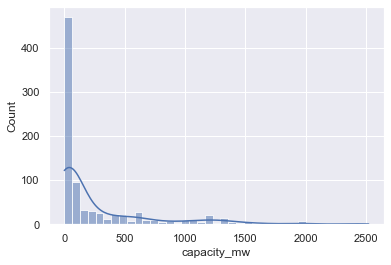

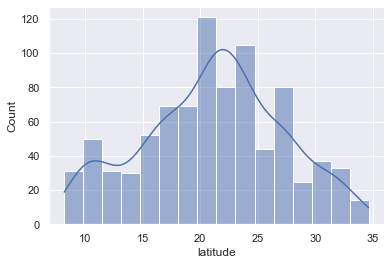

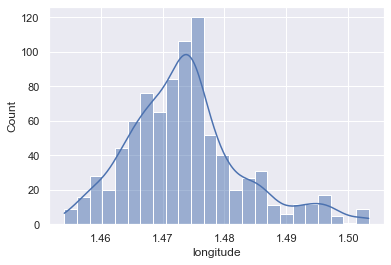

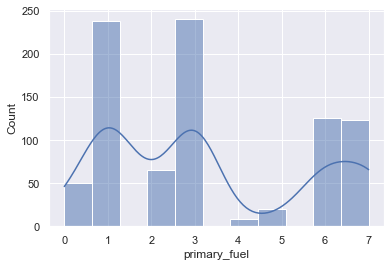

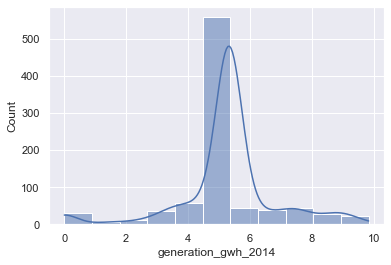

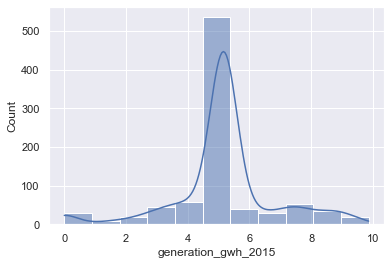

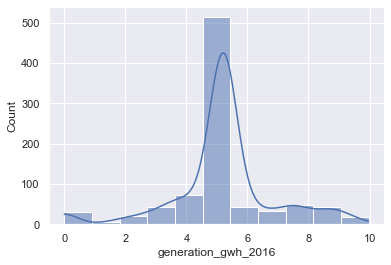

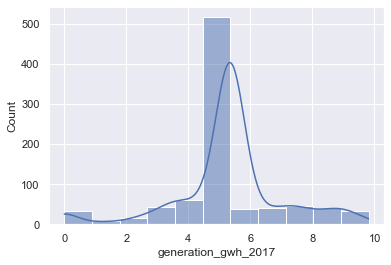

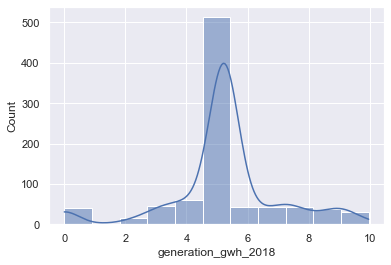

In [94]:
#checking for skewness by visualizing
for i in df.columns:
    sns.histplot(df[i], kde= True)
    plt.show()

Here we never remove skewness from target columns and 'capacity_mw' and 'Primary Fuel' is our target columns so we didn't treat skewness from there 

And visualizing by histplot we can say that skewness is removed from the dataset.

# Correlation between target variable and independent variables

In [95]:
cor=df.corr()

<AxesSubplot:>

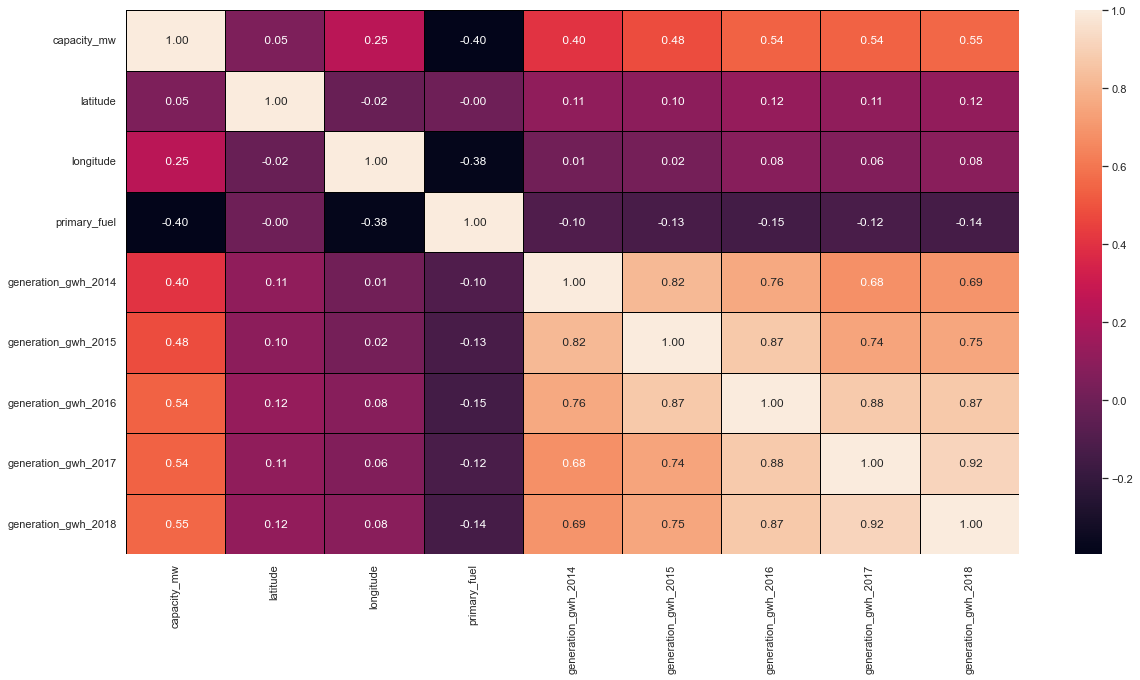

In [96]:
plt.figure(figsize=(20,10))

sns.heatmap(cor,annot= True,linewidths=1,linecolor='black',fmt=' .2f' )

From heat map we can see generation growth columns are highly correlacted with each other.

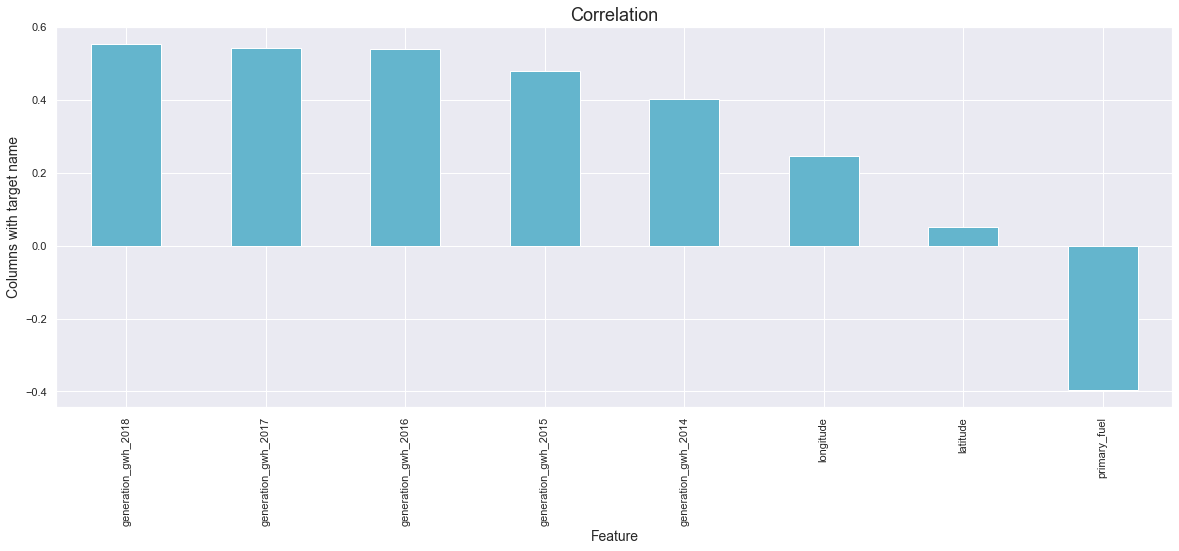

In [97]:
plt.figure(figsize=(20,7))
df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Columns with target name', fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

In [98]:
cor['capacity_mw'].sort_values(ascending=False)

capacity_mw            1.000000
generation_gwh_2018    0.553237
generation_gwh_2017    0.541269
generation_gwh_2016    0.539051
generation_gwh_2015    0.478278
generation_gwh_2014    0.402505
longitude              0.246331
latitude               0.049673
primary_fuel          -0.395254
Name: capacity_mw, dtype: float64

Here we can see only primary fuel  is negative correlated with capacity megawatt, all othere parameters are having strong positve correlation.

# Seprating features and label

In [99]:
x=df.drop('capacity_mw', axis=1)
y=df['capacity_mw']

In [100]:
x

,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,28.1839,1.465222,6,5.320163,5.164105,5.210713,5.347925,5.236042
1,24.7663,1.468377,1,5.320163,5.164105,5.210713,5.347925,5.236042
2,21.9038,1.455936,7,5.320163,5.164105,5.210713,5.347925,5.236042
3,23.8712,1.502466,2,4.985516,5.389557,5.455807,5.075807,5.002476
4,21.9603,1.485210,1,7.422656,8.770288,8.888906,8.566593,9.236723
...,...,...,...,...,...,...,...,...
902,16.2949,1.474522,1,5.320163,0.998716,3.909459,5.423807,5.118705
903,12.8932,1.476284,6,5.320163,5.164105,5.210713,5.347925,5.236042
904,15.2758,1.470579,7,5.320163,5.164105,5.210713,5.347925,5.236042
905,24.3500,1.466399,1,5.320163,5.164105,5.210713,5.347925,5.236042


In [101]:
y

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
902    1600.0
903       3.0
904      25.5
905      80.0
906      16.5
Name: capacity_mw, Length: 871, dtype: float64

In [102]:
x.shape

(871, 8)

In [103]:
y.shape

(871,)

# Feature Scalling Using Standard Scalarization

In [104]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,1.154008,-0.912341,1.191735,0.020660,-0.002993,0.001105,0.021792,-0.005866
1,0.596533,-0.571626,-0.984368,0.020660,-0.002993,0.001105,0.021792,-0.005866
2,0.129605,-1.915197,1.626956,0.020660,-0.002993,0.001105,0.021792,-0.005866
3,0.450525,3.109993,-0.549148,-0.188176,0.131710,0.143625,-0.132028,-0.133852
4,0.138821,1.246305,-0.984368,1.332718,2.151638,2.139938,1.841210,2.186367
...,...,...,...,...,...,...,...,...
866,-0.785313,0.092011,-0.984368,0.020660,-2.491740,-0.755562,0.064686,-0.070163
867,-1.340194,0.282304,1.191735,0.020660,-0.002993,0.001105,0.021792,-0.005866
868,-0.951547,-0.333777,1.626956,0.020660,-0.002993,0.001105,0.021792,-0.005866
869,0.528627,-0.785272,-0.984368,0.020660,-0.002993,0.001105,0.021792,-0.005866


We have scaled the data using standard scalarization method to overcome the issue of biasness we have use standard scaler which will convert dataset into mean=0 and std=1

Now we check for the multicolinearity for this we use Variance Inflation factor(VIF) method

# Checking for multicolinearity

In [105]:
# Find Varience Inflation Factor (VIF) in each scaled column above.

from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd


vif = pd.DataFrame()

vif['VIF values'] = [variance_inflation_factor(x.values, i)
              for i in range(len(x.columns))]
vif['Features'] = x.columns

vif

,VIF values,Features
0,1.018416,latitude
1,1.190436,longitude
2,1.193320,primary_fuel
3,3.168766,generation_gwh_2014
4,5.611123,generation_gwh_2015
5,8.864801,generation_gwh_2016
6,7.419816,generation_gwh_2017
7,7.339536,generation_gwh_2018


The thershold value for vif is 10. If vif value is greater than 10 than we can say that multicolinearity is present there but here vif values in all the columns are less than 10 so we can say that multicolinearity is not present in the dataset

# Modeling

In [106]:
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# Linear Regression

In [107]:
lr = LinearRegression()

for i in range(1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=i, test_size=0.30)
    lr.fit(x_train, y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    
    train_r2_score = round(r2_score(y_train, pred_train) * 100, 1)
    test_r2_score = round(r2_score(y_test, pred_test) * 100, 1)
    
    if train_r2_score == test_r2_score:
        print("At Random state", i, "The model performs very well")
        print("At random State:", i)
        print("Training r2_score:", train_r2_score)
        print("Testing r2 score:", test_r2_score)

At Random state 53 The model performs very well
At random State: 53
Training r2_score: 42.9
Testing r2 score: 42.9
At Random state 79 The model performs very well
At random State: 79
Training r2_score: 42.1
Testing r2 score: 42.1
At Random state 410 The model performs very well
At random State: 410
Training r2_score: 43.0
Testing r2 score: 43.0
At Random state 466 The model performs very well
At random State: 466
Training r2_score: 42.9
Testing r2 score: 42.9
At Random state 808 The model performs very well
At random State: 808
Training r2_score: 42.4
Testing r2 score: 42.4


At random State: 410
Training r2_score 43
Testing r2 score 43

In [108]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.30, random_state= 410)

In [109]:
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)

print('Linear model accuracy is: ',r2_score(y_test,pred_test))

Linear model accuracy is:  0.430339631378445


# Cross Validation of Model

In [110]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
lr = LinearRegression()

test_accuracy = r2_score(y_test, pred_test)

for i in range(2, 10):
    cv_score = cross_val_score(lr, x, y, cv=i, scoring='r2')
    cv_mean = cv_score.mean()
    print(f"At cross fold {i}, the Cross Val score is {cv_mean * 100} and the Accuracy score is {test_accuracy * 100}")

At cross fold 2, the Cross Val score is 39.305309684835834 and the Accuracy score is 43.0339631378445
At cross fold 3, the Cross Val score is 36.96591544917712 and the Accuracy score is 43.0339631378445
At cross fold 4, the Cross Val score is 38.84811605691706 and the Accuracy score is 43.0339631378445
At cross fold 5, the Cross Val score is 38.29813591714494 and the Accuracy score is 43.0339631378445
At cross fold 6, the Cross Val score is 36.646880719761434 and the Accuracy score is 43.0339631378445
At cross fold 7, the Cross Val score is 37.104459166930354 and the Accuracy score is 43.0339631378445
At cross fold 8, the Cross Val score is 38.70308637762182 and the Accuracy score is 43.0339631378445
At cross fold 9, the Cross Val score is 36.00824331486395 and the Accuracy score is 43.0339631378445


At cross fold 2, the Cross Val score is 39.305309684835834 and the Accuracy score is 43.0339631378445

In [111]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,pred_test))
print('Mean Squared Error:', mean_squared_error(y_test,pred_test))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test,pred_test)))

Error:
Mean Absolute Error: 235.92943750662613
Mean Squared Error: 122050.33436959665
Root Mean Square Error: 349.3570299415723


In [160]:
print('Difference between Accuracy score and cross validation score is -',test_accuracy - cv_mean)

Difference between Accuracy score and cross validation score is - -0.29949193072176306


Here the performance of the model is very low let's try another models

# Lasso

In [175]:
ls=Lasso()
ls.fit(x_train, y_train)
ls.score(x_train, y_train)
ls_pred=ls.predict(x_test)

lsd=r2_score(y_test, ls_pred)
print('R2 score:', lsd*100)

rdscore= cross_val_score(ls,x,y,cv=2,scoring='r2')
lsc=rdscore.mean()
print('Cross val Score :', lsc*100) 

R2 score: 42.96347472412856
Cross val Score : 39.68761967636854


### check for cv value 

In [178]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
ls=Lasso()

test_accuracy = r2_score(y_test, pred_test)

for i in range(2, 10):
    cv_score = cross_val_score(ls, x, y, cv=i, scoring='r2')
    cv_mean = cv_score.mean()
    print(f"At cross fold {i}, the Cross Val score is {cv_mean * 100} and the Accuracy score is {test_accuracy * 100}")

At cross fold 2, the Cross Val score is 39.68761967636854 and the Accuracy score is 43.0339631378445
At cross fold 3, the Cross Val score is 37.52744010355476 and the Accuracy score is 43.0339631378445
At cross fold 4, the Cross Val score is 39.265551145484764 and the Accuracy score is 43.0339631378445
At cross fold 5, the Cross Val score is 38.630344456231775 and the Accuracy score is 43.0339631378445
At cross fold 6, the Cross Val score is 36.811159945166864 and the Accuracy score is 43.0339631378445
At cross fold 7, the Cross Val score is 37.19734647436227 and the Accuracy score is 43.0339631378445
At cross fold 8, the Cross Val score is 38.805386049372515 and the Accuracy score is 43.0339631378445
At cross fold 9, the Cross Val score is 36.12596313882312 and the Accuracy score is 43.0339631378445


In [176]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,ls_pred))
print('Mean Squared Error:', mean_squared_error(y_test,ls_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test,ls_pred)))

Error:
Mean Absolute Error: 236.08185013490157
Mean Squared Error: 122201.3565388943
Root Mean Square Error: 349.5731061436138


In [177]:
print('Difference between Accuracy score and cross validation score is -',lsd - lsc)

Difference between Accuracy score and cross validation score is - 0.03275855047760018


R2 score:  42.96347472412856

Cross val Score : 39.68761967636854

Modle is not performing well.

Let's try another model

# Ridge

In [114]:
rd= Ridge()
rd.fit(x_train, y_train)
rd.score(x_train, y_train)
rd_pred= rd.predict(x_test)

rds=r2_score(y_test, rd_pred)
print('r2 score: ', rds*100)

rdcvscore= cross_val_score(rd,x,y,cv=2, scoring='r2')
rdcv=rdcvscore.mean()
print('Cross val Score', rdcv*100)

r2 score:  43.05575227842618
Cross val Score 38.729299918265845


### check for cv value 

In [179]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
rd= Ridge()

test_accuracy = r2_score(y_test, pred_test)

for i in range(2, 10):
    cv_score = cross_val_score(rd, x, y, cv=i, scoring='r2')
    cv_mean = cv_score.mean()
    print(f"At cross fold {i}, the Cross Val score is {cv_mean * 100} and the Accuracy score is {test_accuracy * 100}")

At cross fold 2, the Cross Val score is 39.41787971406164 and the Accuracy score is 43.0339631378445
At cross fold 3, the Cross Val score is 37.076677327575005 and the Accuracy score is 43.0339631378445
At cross fold 4, the Cross Val score is 38.896564201573156 and the Accuracy score is 43.0339631378445
At cross fold 5, the Cross Val score is 38.359672066193426 and the Accuracy score is 43.0339631378445
At cross fold 6, the Cross Val score is 36.71277236840922 and the Accuracy score is 43.0339631378445
At cross fold 7, the Cross Val score is 37.15932180437974 and the Accuracy score is 43.0339631378445
At cross fold 8, the Cross Val score is 38.729299918265845 and the Accuracy score is 43.0339631378445
At cross fold 9, the Cross Val score is 36.073012905032606 and the Accuracy score is 43.0339631378445


In [115]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,rd_pred))
print('Mean Squared Error:', mean_squared_error(y_test,rd_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test,rd_pred)))

Error:
Mean Absolute Error: 235.94601145874844
Mean Squared Error: 122003.65090625417
Root Mean Square Error: 349.29021014946034


In [162]:
print('Difference between Accuracy score and cross validation score is -',rds - rdcv)

Difference between Accuracy score and cross validation score is - 0.04326452360160343


r2 score: 43.05575227842618
Cross val Score 38.729299918265845


Model still not perfroming well. Lets try another one.

# Decision TreeRegressor

In [181]:
dt=DecisionTreeRegressor()
dt.fit(x_train, y_train)
dt.score(x_train, y_train)
dt_pred=dt.predict(x_test)

dt_score=r2_score(y_test, dt_pred)
print('R2 Score:', dt_score*100)

dtcvscore=cross_val_score(dt,x,y,cv=2, scoring='r2')
dtcv=dtcvscore.mean()
print('Cross Val Score:', dtcv*100)

R2 Score: 66.54563868633608
Cross Val Score: 68.74671078750319


### check for cv value 

In [180]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
dt=DecisionTreeRegressor()

test_accuracy = r2_score(y_test, pred_test)

for i in range(2, 10):
    cv_score = cross_val_score(dt, x, y, cv=i, scoring='r2')
    cv_mean = cv_score.mean()
    print(f"At cross fold {i}, the Cross Val score is {cv_mean * 100} and the Accuracy score is {test_accuracy * 100}")

At cross fold 2, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 3, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 4, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 5, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 6, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 7, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 8, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 9, the Cross Val score is nan and the Accuracy score is 43.0339631378445


In [182]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,dt_pred))
print('Mean Squared Error:', mean_squared_error(y_test,dt_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test,dt_pred)))

Error:
Mean Absolute Error: 121.65382026370577
Mean Squared Error: 71676.32170611003
Root Mean Square Error: 267.7243390245086


In [183]:
print('Difference between Accuracy score and cross validation score is -',dt_score - dtcv)

Difference between Accuracy score and cross validation score is - -0.02201072101167112


R2 Score: 66.54563868633608

Cross Val Score: 68.74671078750319

Modle performance is poor.

# KNeighborsRegressor

In [185]:
kn=KNeighborsRegressor()
kn.fit(x_train, y_train)
kn.score(x_train,y_train)
kn_pred=kn.predict(x_test)

kn_score= r2_score(y_test, kn_pred)
print('R2 Score:', kn_score*100)

kn_cvscore=cross_val_score(kn,x,y, cv=2, scoring='r2')
cv_mean=kn_cvscore.mean()
print('Cross val Score :',cv_mean*100 )

R2 Score: 73.61721227034054
Cross val Score : 70.99917988648393


### check for cv value 

In [184]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
kn=KNeighborsRegressor()

test_accuracy = r2_score(y_test, pred_test)

for i in range(2, 10):
    cv_score = cross_val_score(kn, x, y, cv=i, scoring='r2')
    cv_mean = cv_score.mean()
    print(f"At cross fold {i}, the Cross Val score is {cv_mean * 100} and the Accuracy score is {test_accuracy * 100}")

At cross fold 2, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 3, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 4, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 5, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 6, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 7, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 8, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 9, the Cross Val score is nan and the Accuracy score is 43.0339631378445


In [186]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,kn_pred))
print('Mean Squared Error:', mean_squared_error(y_test,kn_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test,kn_pred)))

Error:
Mean Absolute Error: 112.70277709923664
Mean Squared Error: 56525.40077166931
Root Mean Square Error: 237.75071140097418


In [187]:
print('Difference between Accuracy score and cross validation score is -',kn_score - cv_mean)

Difference between Accuracy score and cross validation score is - 0.026180323838566166


R2 Score: 73.61721227034054

Cross val Score : 70.99917988648393


# RandomForestRegressor

In [189]:
rf=RandomForestRegressor()
rf.fit(x_train, y_train)
rf.score(x_train,y_train)
rf_pred=rf.predict(x_test)

rf_score= r2_score(y_test, rf_pred)
print('R2 score:', rf_score*100)

rfcv=cross_val_score(rf,x,y, cv=2, scoring='r2')
rfcvscore=rfcv.mean()
print('Cross val Score :',rfcvscore*100 )

R2 score: 80.08627162658802
Cross val Score : 76.68641956336108


### check for cv value 

In [188]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
rf=RandomForestRegressor()

test_accuracy = r2_score(y_test, pred_test)

for i in range(2, 10):
    cv_score = cross_val_score(rf, x, y, cv=i, scoring='r2')
    cv_mean = cv_score.mean()
    print(f"At cross fold {i}, the Cross Val score is {cv_mean * 100} and the Accuracy score is {test_accuracy * 100}")

At cross fold 2, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 3, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 4, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 5, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 6, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 7, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 8, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 9, the Cross Val score is nan and the Accuracy score is 43.0339631378445


In [190]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,rf_pred))
print('Mean Squared Error:', mean_squared_error(y_test,rf_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test,rf_pred)))

Error:
Mean Absolute Error: 105.86393046576487
Mean Squared Error: 42665.372920384885
Root Mean Square Error: 206.55598011286162


In [191]:
print('Difference between Accuracy score and cross validation score is -',rf_score - rfcv.mean())

Difference between Accuracy score and cross validation score is - 0.03399852063226927


R2 score: 80.08627162658802

Cross val Score : 76.68641956336108

# GradientBoostingRegressor

In [193]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(x_train, y_train)
gb.score(x_train,y_train)
gb_pred=rf.predict(x_test)

gb_score= r2_score(y_test, rf_pred)
print('R2 score:', gb_score*100)

gbcv=cross_val_score(gb,x,y, cv=2, scoring='r2')
gbcvscore=gbcv.mean()
print('Cross val Score :', gb_score*100 )

R2 score: 80.08627162658802
Cross val Score : 80.08627162658802


### check for cv value 

In [192]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()

test_accuracy = r2_score(y_test, pred_test)

for i in range(2, 10):
    cv_score = cross_val_score(gb, x, y, cv=i, scoring='r2')
    cv_mean = cv_score.mean()
    print(f"At cross fold {i}, the Cross Val score is {cv_mean * 100} and the Accuracy score is {test_accuracy * 100}")

At cross fold 2, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 3, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 4, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 5, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 6, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 7, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 8, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 9, the Cross Val score is nan and the Accuracy score is 43.0339631378445


In [194]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,gb_pred))
print('Mean Squared Error:', mean_squared_error(y_test,gb_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test,gb_pred)))

Error:
Mean Absolute Error: 105.86393046576487
Mean Squared Error: 42665.372920384885
Root Mean Square Error: 206.55598011286162


In [195]:
print('Difference between Accuracy score and cross validation score is -',gb_score -gbcvscore)

Difference between Accuracy score and cross validation score is - 0.0637239103555527


R2 score: 80.08627162658802 

Cross val Score : 80.08627162658802

# Selection of best model

Here we can say that RandomForestRegressor is our best model as r2score= 80.08627162658802, and cross val score= 76.68641956336108 and Difference between Accuracy score and cross validation score is - 0.03399852063226927 which is less amongst all the other models that we have tried so we select RandomForestRegressor as our final model and perfrom hyper parameter tuning on it 

# HyperParameter Tuning

In [199]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [None, 5, 10], 
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]  
}


rf = RandomForestRegressor()

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2)
grid_search.fit(x_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: ", best_params)
print("Best Score: ", best_score)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test Score: ", test_score)

Best Parameters:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Score:  0.7649015357432306
Test Score:  0.7926293563832301


In [200]:
rf=RandomForestRegressor(max_depth=10, min_samples_leaf= 2, min_samples_split= 2, n_estimators= 100)
rf.fit(x_train, y_train)
rf.score(x_train,y_train)
rf_pred=rf.predict(x_test)

rf_score= r2_score(y_test, rf_pred)
print('R2 score:', rf_score*100)

rfcv=cross_val_score(rf,x,y, cv=2, scoring='r2')
rfcvscore=gbcv.mean()
print('Cross val Score :',rfcvscore*100)

R2 score: 80.01239344632025
Cross val Score : 73.71388059103275


Here we can say that RandomForestRegressor is our best fitted model with R2 score= 80.01239344632025 and cross val score=73.71388059103275. 

# Saving Best Model

In [204]:
import pickle
filename='Global_Power_Plant_Database_regression.pkl'
pickle.dump(rf,open(filename,'wb'))

# Lets predict the primary fuel.

In [127]:
df

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,1.465222,6,5.320163,5.164105,5.210713,5.347925,5.236042
1,98.0,24.7663,1.468377,1,5.320163,5.164105,5.210713,5.347925,5.236042
2,39.2,21.9038,1.455936,7,5.320163,5.164105,5.210713,5.347925,5.236042
3,135.0,23.8712,1.502466,2,4.985516,5.389557,5.455807,5.075807,5.002476
4,1800.0,21.9603,1.485210,1,7.422656,8.770288,8.888906,8.566593,9.236723
...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,1.474522,1,5.320163,0.998716,3.909459,5.423807,5.118705
903,3.0,12.8932,1.476284,6,5.320163,5.164105,5.210713,5.347925,5.236042
904,25.5,15.2758,1.470579,7,5.320163,5.164105,5.210713,5.347925,5.236042
905,80.0,24.3500,1.466399,1,5.320163,5.164105,5.210713,5.347925,5.236042


In [128]:
# deviding into fetures and target. 
x2=df.drop('primary_fuel', axis=1)
y2=df['primary_fuel']

# Scaling the data Using StandardScaler

In [129]:
sts=StandardScaler()
x2=sts.fit_transform(x2)

In [130]:
x2

array([[-6.07572430e-01,  1.15400849e+00, -9.12340658e-01, ...,
         1.10484553e-03,  2.17922617e-02, -5.86644248e-03],
       [-3.93017807e-01,  5.96533203e-01, -5.71625567e-01, ...,
         1.10484553e-03,  2.17922617e-02, -5.86644248e-03],
       [-5.25120549e-01,  1.29605239e-01, -1.91519694e+00, ...,
         1.10484553e-03,  2.17922617e-02, -5.86644248e-03],
       ...,
       [-5.55899589e-01, -9.51547092e-01, -3.33776508e-01, ...,
         1.10484553e-03,  2.17922617e-02, -5.86644248e-03],
       [-4.33457422e-01,  5.28626788e-01, -7.85272226e-01, ...,
         1.10484553e-03,  2.17922617e-02, -5.86644248e-03],
       [-5.76119396e-01, -1.82283059e+00,  1.20390903e-01, ...,
         1.10484553e-03,  2.17922617e-02, -5.86644248e-03]])

# Checking for multicollinearity 

In [131]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [132]:
df_col=pd.DataFrame(data=x2, columns=['capacity_mw','latitude', 'longitude',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'])

In [133]:
vif = pd.DataFrame()

vif['VIF values'] = [variance_inflation_factor(df_col.values, i)
              for i in range(len(df_col.columns))]
vif['Features'] =df_col.columns

vif

,VIF values,Features
0,1.576418,capacity_mw
1,1.018568,latitude
2,1.089787,longitude
3,3.175688,generation_gwh_2014
4,5.632787,generation_gwh_2015
5,8.877616,generation_gwh_2016
6,7.461317,generation_gwh_2017
7,7.429105,generation_gwh_2018


If vif value is greater than 10 than we can say that multicolinearity is present there but here vif values in all the columns are less than 10 so we can say that multicolinearity is not present in the dataset

# Model building

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

# Chosing Best Random State

In [135]:
lr= LogisticRegression()
for i in range(0,1000):
    x_train_a, x_test_a, y_train_a, y_test_a= train_test_split(x2,y2, random_state= i, test_size= 0.20)
    lr.fit(x_train_a, y_train_a)
    pred_train_a=lr.predict(x_train_a)
    pred_test_a=lr.predict(x_test_a)
    if round(accuracy_score(y_train_a,pred_train_a)*100,1)== round(accuracy_score(y_test_a,pred_test_a)*100,1):
        print("At Random state ", i, "The Model performing Well")
        print("At Random State", i)
        print("Training Accuracy score is-",accuracy_score(y_train_a,pred_train_a)*100 )
        print("Testing Accuracy Score is-", accuracy_score(y_test_a,pred_test_a)*100)

At Random state  357 The Model performing Well
At Random State 357
Training Accuracy score is- 53.735632183908045
Testing Accuracy Score is- 53.714285714285715
At Random state  368 The Model performing Well
At Random State 368
Training Accuracy score is- 53.735632183908045
Testing Accuracy Score is- 53.714285714285715
At Random state  422 The Model performing Well
At Random State 422
Training Accuracy score is- 53.735632183908045
Testing Accuracy Score is- 53.714285714285715
At Random state  480 The Model performing Well
At Random State 480
Training Accuracy score is- 54.310344827586206
Testing Accuracy Score is- 54.285714285714285
At Random state  599 The Model performing Well
At Random State 599
Training Accuracy score is- 52.58620689655172
Testing Accuracy Score is- 52.57142857142857
At Random state  745 The Model performing Well
At Random State 745
Training Accuracy score is- 53.735632183908045
Testing Accuracy Score is- 53.714285714285715
At Random state  862 The Model performing 

At Random State 480

Training Accuracy score is- 54.310344827586206

Testing Accuracy Score is- 54.285714285714285

In [136]:
x_train_a, x_test_a, y_train_a, y_test_a= train_test_split(x2,y2,random_state=480,test_size=0.20)

In [137]:
lr.fit(x_train_a, y_train_a)
lr_pred=lr.predict(x_test_a)
print(accuracy_score(y_test_a,lr_pred))

0.5428571428571428


In [138]:
from sklearn.metrics import classification_report 
print(confusion_matrix(y_test_a, lr_pred))
print(classification_report(y_test_a, lr_pred))

[[ 0  0  0  1  0  0  1  5]
 [ 0 24  0 18  0  0  4  3]
 [ 0  4  2  0  0  1  0  2]
 [ 0  9  0 31  0  0  2  8]
 [ 0  3  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  1]
 [ 0  0  0  5  0  0 20  4]
 [ 0  0  0  5  0  0  4 17]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.60      0.49      0.54        49
           2       1.00      0.22      0.36         9
           3       0.52      0.62      0.56        50
           4       0.00      0.00      0.00         3
           5       0.50      0.50      0.50         2
           6       0.65      0.69      0.67        29
           7       0.42      0.65      0.52        26

    accuracy                           0.54       175
   macro avg       0.46      0.40      0.39       175
weighted avg       0.54      0.54      0.52       175



# Cross validation of model

In [139]:
lr_pred=lr.predict(x_test_a)
from sklearn.model_selection import cross_val_score
lr_score=accuracy_score(y_test_a,lr_pred)
for j in range(2,10):
    lr_cv= cross_val_score(lr,x2,y2,cv=j, scoring='accuracy')
    lr_cvscore=lr_cv.mean()
    print("at cv:-", j)
    print("Cross Validation scre is:-",lr_cvscore*100)
    print("Accuracy Score:-", lr_score*100)
    print("\n")

at cv:- 2
Cross Validation scre is:- 51.20452388484657
Accuracy Score:- 54.285714285714285


at cv:- 3
Cross Validation scre is:- 51.54520677805428
Accuracy Score:- 54.285714285714285


at cv:- 4
Cross Validation scre is:- 51.54790090052002
Accuracy Score:- 54.285714285714285


at cv:- 5
Cross Validation scre is:- 52.12019704433498
Accuracy Score:- 54.285714285714285


at cv:- 6
Cross Validation scre is:- 51.66036844591403
Accuracy Score:- 54.285714285714285


at cv:- 7
Cross Validation scre is:- 52.237788018433186
Accuracy Score:- 54.285714285714285


at cv:- 8
Cross Validation scre is:- 52.693892286782194
Accuracy Score:- 54.285714285714285


at cv:- 9
Cross Validation scre is:- 53.61659984726995
Accuracy Score:- 54.285714285714285




at cv:- 9
Cross Validation scre is:- 53.61659984726995
Accuracy Score:- 54.285714285714285


At cv-9 Cross val score and Accuracy Score are having very less diffrence, Model is perfoming well.
But still need improvement

# SVC

In [140]:
svc=SVC()
svc.fit(x_train_a, y_train_a)
svc.score(x_train_a, y_train_a)
svc_pred=svc.predict(x_test_a)

svc_d=accuracy_score(y_test_a, svc_pred)
print('Accuracy_core:', svc_d*100)

svc_cv= cross_val_score(svc,x2,y2,cv=9, scoring='accuracy')
svc_score=svc_cv.mean()
print('Cross val Score :', svc_score*100)

Accuracy_core: 61.142857142857146
Cross val Score : 57.04944635357007


### check for cv

In [205]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
svc=SVC()

test_accuracy = r2_score(y_test, pred_test)

for i in range(2, 10):
    cv_score = cross_val_score(svc, x, y, cv=i, scoring='r2')
    cv_mean = cv_score.mean()
    print(f"At cross fold {i}, the Cross Val score is {cv_mean * 100} and the Accuracy score is {test_accuracy * 100}")

At cross fold 2, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 3, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 4, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 5, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 6, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 7, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 8, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 9, the Cross Val score is nan and the Accuracy score is 43.0339631378445


In [141]:
print(confusion_matrix(y_test_a, svc_pred))
print(classification_report(y_test_a, svc_pred))

[[ 0  1  0  0  0  0  1  5]
 [ 0 38  0  4  0  0  4  3]
 [ 0  3  2  1  0  1  0  2]
 [ 0 12  0 29  0  0  0  9]
 [ 0  3  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  1]
 [ 0  4  0  1  0  0 18  6]
 [ 0  4  0  0  0  0  2 20]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.58      0.78      0.67        49
           2       0.67      0.22      0.33         9
           3       0.83      0.58      0.68        50
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         2
           6       0.72      0.62      0.67        29
           7       0.43      0.77      0.56        26

    accuracy                           0.61       175
   macro avg       0.40      0.37      0.36       175
weighted avg       0.62      0.61      0.59       175



In [206]:
print('Difference between Accuracy score and cross validation score is -',svc_d - svc_score)

Difference between Accuracy score and cross validation score is - 0.040934107892870775


Accuracy_core: 61.142857142857146

Cross val Score : 57.04944635357007

svc model is perfroming well than logistic regression model. lets try another model

# KNeighborsClassifier

In [217]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
kn=KNeighborsClassifier()

test_accuracy = r2_score(y_test, pred_test)

for i in range(2, 10):
    cv_score = cross_val_score(kn, x, y, cv=i, scoring='r2')
    cv_mean = cv_score.mean()
    print(f"At cross fold {i}, the Cross Val score is {cv_mean * 100} and the Accuracy score is {test_accuracy * 100}")

At cross fold 2, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 3, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 4, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 5, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 6, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 7, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 8, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 9, the Cross Val score is nan and the Accuracy score is 43.0339631378445


### cross validation

In [142]:
kn=KNeighborsClassifier()
kn.fit(x_train_a, y_train_a)
kn.score(x_train_a,y_train_a)
kn_pred=kn.predict(x_test_a)

kn_score= accuracy_score(y_test_a, kn_pred)
print('accuracy_score:', kn_score*100)

kncvscore=cross_val_score(kn,x2,y2, cv=9, scoring='accuracy')
kncv_score=kncvscore.mean()
print('Cross val Score :',kncv_score*100 )

accuracy_score: 67.42857142857143
Cross val Score : 64.51651393661703


In [143]:
print(confusion_matrix(y_test_a, kn_pred))
print(classification_report(y_test_a, kn_pred))

[[ 5  1  0  0  0  0  1  0]
 [ 2 36  1  9  0  0  0  1]
 [ 0  2  3  1  0  2  1  0]
 [ 2  7  1 37  0  2  0  1]
 [ 0  3  0  0  0  0  0  0]
 [ 0  0  0  1  0  1  0  0]
 [ 1  2  0  0  0  0 23  3]
 [ 4  2  0  3  0  1  3 13]]
              precision    recall  f1-score   support

           0       0.36      0.71      0.48         7
           1       0.68      0.73      0.71        49
           2       0.60      0.33      0.43         9
           3       0.73      0.74      0.73        50
           4       0.00      0.00      0.00         3
           5       0.17      0.50      0.25         2
           6       0.82      0.79      0.81        29
           7       0.72      0.50      0.59        26

    accuracy                           0.67       175
   macro avg       0.51      0.54      0.50       175
weighted avg       0.69      0.67      0.67       175



In [208]:
print('Difference between Accuracy score and cross validation score is -',kn_score - kncv_score)

Difference between Accuracy score and cross validation score is - 0.09100698333723523


accuracy_score: 67.42857142857143
    
Cross val Score : 64.51651393661703

Model is perfroming well as compare to SVC 

# DecisionTreeClassifier

In [144]:
dt=DecisionTreeClassifier()
dt.fit(x_train_a,y_train_a)
dt.score(x_train_a, y_train_a)
dt_pred=dt.predict(x_test_a)

dt_score= accuracy_score(y_test_a, dt_pred)
print("accuracy_score", dt_score*100)

dt_cv=cross_val_score(dt,x2,y2,cv=9, scoring='accuracy')
dtcv_score= dt_cv.mean()
print("Cross val score is:",dtcv_score*100 )

accuracy_score 69.71428571428572
Cross val score is: 64.6274818633066


### cross validation

In [216]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
dt=DecisionTreeClassifier()

test_accuracy = r2_score(y_test, pred_test)

for i in range(2, 10):
    cv_score = cross_val_score(dt, x, y, cv=i, scoring='r2')
    cv_mean = cv_score.mean()
    print(f"At cross fold {i}, the Cross Val score is {cv_mean * 100} and the Accuracy score is {test_accuracy * 100}")

At cross fold 2, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 3, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 4, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 5, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 6, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 7, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 8, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 9, the Cross Val score is nan and the Accuracy score is 43.0339631378445


In [145]:
print(confusion_matrix(y_test_a, svc_pred))
print(classification_report(y_test_a, svc_pred))

[[ 0  1  0  0  0  0  1  5]
 [ 0 38  0  4  0  0  4  3]
 [ 0  3  2  1  0  1  0  2]
 [ 0 12  0 29  0  0  0  9]
 [ 0  3  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  1]
 [ 0  4  0  1  0  0 18  6]
 [ 0  4  0  0  0  0  2 20]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.58      0.78      0.67        49
           2       0.67      0.22      0.33         9
           3       0.83      0.58      0.68        50
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         2
           6       0.72      0.62      0.67        29
           7       0.43      0.77      0.56        26

    accuracy                           0.61       175
   macro avg       0.40      0.37      0.36       175
weighted avg       0.62      0.61      0.59       175



In [210]:
print('Difference between Accuracy score and cross validation score is -',dt_score - dtcv_score)

Difference between Accuracy score and cross validation score is - 0.01918156823029471


accuracy_score 70.85714285714285

Cross val score is: 65.3159602901871

# RandomForestClassifier

In [146]:
rf=RandomForestClassifier()
rf.fit(x_train_a, y_train_a)
rf.score(x_train_a,y_train_a)
rf_pred=rf.predict(x_test_a)

rf_score= accuracy_score(y_test_a, rf_pred)
print('accuracy_score: ', rf_score*100)

rfcvscore=cross_val_score(rf,x2,y2, cv=9, scoring='accuracy')
rfcv_score=rfcvscore.mean()
print('Cross val Score :',rfcv_score*100 )

accuracy_score:  76.0
Cross val Score : 72.78183466972126


### cross validation

In [215]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
rf=RandomForestClassifier()

test_accuracy = r2_score(y_test, pred_test)

for i in range(2, 10):
    cv_score = cross_val_score(rf, x, y, cv=i, scoring='r2')
    cv_mean = cv_score.mean()
    print(f"At cross fold {i}, the Cross Val score is {cv_mean * 100} and the Accuracy score is {test_accuracy * 100}")

At cross fold 2, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 3, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 4, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 5, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 6, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 7, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 8, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 9, the Cross Val score is nan and the Accuracy score is 43.0339631378445


In [147]:
print(confusion_matrix(y_test_a, rf_pred))
print(classification_report(y_test_a, rf_pred))

[[ 5  0  0  1  0  0  1  0]
 [ 3 35  0  8  0  0  2  1]
 [ 0  3  4  1  0  1  0  0]
 [ 2  5  0 40  0  0  2  1]
 [ 0  2  0  0  0  0  1  0]
 [ 0  0  0  0  0  2  0  0]
 [ 0  0  0  0  0  0 26  3]
 [ 1  1  0  1  0  0  2 21]]
              precision    recall  f1-score   support

           0       0.45      0.71      0.56         7
           1       0.76      0.71      0.74        49
           2       1.00      0.44      0.62         9
           3       0.78      0.80      0.79        50
           4       0.00      0.00      0.00         3
           5       0.67      1.00      0.80         2
           6       0.76      0.90      0.83        29
           7       0.81      0.81      0.81        26

    accuracy                           0.76       175
   macro avg       0.65      0.67      0.64       175
weighted avg       0.76      0.76      0.75       175



In [212]:
print('Difference between Accuracy score and cross validation score is -',rf_score - rfcv_score)

Difference between Accuracy score and cross validation score is - 0.07914264389428294


accuracy_score:  77.14285714285715

Cross val Score : 72.20790378006873

# AdaBoostClassifier

In [148]:
ad=AdaBoostClassifier()
ad.fit(x_train_a, y_train_a)
ad.score(x_train_a,y_train_a)
ad_pred=ad.predict(x_test_a)

ad_score= accuracy_score(y_test_a, ad_pred)
print('accuracy_score: ', ad_score*100)

adcvscore=cross_val_score(ad,x2,y2, cv=9, scoring='accuracy')
adcv_score=adcvscore.mean()
print('Cross val Score :',adcv_score*100 )

accuracy_score:  35.42857142857142
Cross val Score : 36.98572928598701


### cross validation

In [214]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
ad=AdaBoostClassifier()
test_accuracy = r2_score(y_test, pred_test)

for i in range(2, 10):
    cv_score = cross_val_score(ad, x, y, cv=i, scoring='r2')
    cv_mean = cv_score.mean()
    print(f"At cross fold {i}, the Cross Val score is {cv_mean * 100} and the Accuracy score is {test_accuracy * 100}")

At cross fold 2, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 3, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 4, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 5, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 6, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 7, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 8, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 9, the Cross Val score is nan and the Accuracy score is 43.0339631378445


In [149]:
print(confusion_matrix(y_test_a, ad_pred))
print(classification_report(y_test_a, ad_pred))

[[ 0  0  0  7  0  0  0  0]
 [ 0 21  0 28  0  0  0  0]
 [ 0  3  0  6  0  0  0  0]
 [ 0  9  0 41  0  0  0  0]
 [ 0  2  0  1  0  0  0  0]
 [ 0  0  0  2  0  0  0  0]
 [ 0  0  0 29  0  0  0  0]
 [ 0  0  0 26  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.60      0.43      0.50        49
           2       0.00      0.00      0.00         9
           3       0.29      0.82      0.43        50
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00        29
           7       0.00      0.00      0.00        26

    accuracy                           0.35       175
   macro avg       0.11      0.16      0.12       175
weighted avg       0.25      0.35      0.26       175



In [218]:
print('Difference between Accuracy score and cross validation score is -',ad_score - adcv_score)

Difference between Accuracy score and cross validation score is - -0.015571578574155864


accuracy_score:  35.42857142857142
    
    
Cross val Score : 36.98572928598701

# GaussianNB

In [150]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(x_train_a, y_train_a)
gb.score(x_train_a, y_train_a)
gb_pred=gb.predict(x_test_a)

gb_score=accuracy_score(y_test_a, gb_pred)
print("Accuracy Score is:", gb_score*100)

gb_cv= cross_val_score(gb, x2,y2,cv=9, scoring='accuracy')
gb_cvscore=gb_cv.mean()
print("Cross Val Score is :", gb_cvscore*100)

Accuracy Score is: 52.57142857142857
Cross Val Score is : 52.922155402825524


### cross validation

In [219]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
gb=GaussianNB()
test_accuracy = r2_score(y_test, pred_test)

for i in range(2, 10):
    cv_score = cross_val_score(gb, x, y, cv=i, scoring='r2')
    cv_mean = cv_score.mean()
    print(f"At cross fold {i}, the Cross Val score is {cv_mean * 100} and the Accuracy score is {test_accuracy * 100}")

At cross fold 2, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 3, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 4, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 5, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 6, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 7, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 8, the Cross Val score is nan and the Accuracy score is 43.0339631378445
At cross fold 9, the Cross Val score is nan and the Accuracy score is 43.0339631378445


In [151]:
print(confusion_matrix(y_test_a, gb_pred))
print(classification_report(y_test_a, gb_pred))

[[ 6  0  0  0  0  0  1  0]
 [ 2 23  5  6  0  0  5  8]
 [ 0  2  1  4  0  1  0  1]
 [ 8  8  1 23  0  1  2  7]
 [ 0  3  0  0  0  0  0  0]
 [ 1  0  0  0  0  1  0  0]
 [ 1  0  0  0  0  0 24  4]
 [ 3  0  0  0  0  0  9 14]]
              precision    recall  f1-score   support

           0       0.29      0.86      0.43         7
           1       0.64      0.47      0.54        49
           2       0.14      0.11      0.12         9
           3       0.70      0.46      0.55        50
           4       0.00      0.00      0.00         3
           5       0.33      0.50      0.40         2
           6       0.59      0.83      0.69        29
           7       0.41      0.54      0.47        26

    accuracy                           0.53       175
   macro avg       0.39      0.47      0.40       175
weighted avg       0.56      0.53      0.52       175



In [220]:
print('Difference between Accuracy score and cross validation score is -',gb_score - gb_cvscore)

Difference between Accuracy score and cross validation score is - 0.2716411622376249


Accuracy Score is: 52.57142857142857
    
    
Cross Val Score is : 52.922155402825524

# Selecting our final model 

After trying different- different models we can say that RandomForestClassifier is our best model because RandomForestClassifier giving us higest accuracy score and cross val score among other models 

accuracy_score: 77.14285714285715

Cross val Score : 72.20790378006873

Difference between Accuracy score and cross validation score is - 0.07914264389428294

and difference between accuracy score and cross val score for RandomForestClassifier is also minimum among other models. 

# Hyperparameter Tuning 

In [152]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters={'n_estimators' : [100, 300,400, 500, 800, 1200], 'criterion':['gini', 'entropy'], 'max_features':['auto','sqrt', 'log2'], 'min_samples_split':[2, 5, 10, 15, 100],'max_depth':[5, 8, 15, 25, 30] }
rf=RandomForestClassifier()
rfclf=GridSearchCV(rf, param_grid=parameters, n_jobs=-1)
rfclf.fit(x_train_a, y_train_a)
print(rfclf.best_params_)

{'criterion': 'gini', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}


In [221]:
rf=RandomForestClassifier(criterion='gini',max_depth=30, max_features='sqrt', min_samples_split=2, n_estimators=100 )
rf.fit(x_train_a, y_train_a)
rf.score(x_train_a,y_train_a)
rf_pred=rf.predict(x_test_a)

rf_score= accuracy_score(y_test_a, rf_pred)
print('accuracy_score: ', rf_score*100)

rfcvscore=cross_val_score(rf,x2,y2, cv=9,scoring='accuracy')
rfcv_score=rfcvscore.mean()
print('Cross val Score :',rfcv_score*100 )

accuracy_score:  75.42857142857143
Cross val Score : 72.66728713249331


# RandomForestClassifier with accuracy_score: 75.42857142857143 Cross val Score : 72.66728713249331 is our best model.

# saving model 

In [154]:
import pickle
filename="Evaluation_Project-Global_Power_Plant_Database_logic.pkl "
pickle.dump(dt, open(filename,'wb'))

In [155]:
import numpy as np
a=np.array(y_test_a)
predicted= np.array(rf.predict(x_test_a))
df_com= pd.DataFrame({'original':a, 'predicted':predicted}, index= range(len(a)))
df_com

,original,predicted
0,7,0
1,3,3
2,7,7
3,6,7
4,3,3
...,...,...
170,6,6
171,6,6
172,7,7
173,6,6


# Conclusion 

 Here we can see that predicted values and original values are almost similiar so we can say that our model is perfroming very well. 